In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
import re
from collections import Counter
import matplotlib.ticker as mtick
import warnings

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', 1000)

# Suppress warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('fivethirtyeight')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 100

print("Libraries imported successfully!")

# ## 1. Data Loading and Initial Inspection

# Load the survey data
file_path = file_path = r"C:\xampp\htdocs\PesaGuru\notebooks\data\external\Financial_Advisory_Chatbot_Survey.csv"


# Check if file exists
if os.path.exists(file_path):
    print(f"File found: {file_path}")
    df = pd.read_csv(file_path)
    print(f"Data loaded successfully: {df.shape[0]} rows and {df.shape[1]} columns")
else:
    print(f"File not found: {file_path}")
    # Try an alternative path
    alt_path = "../../../data/external/financial_advisory_chabot_survey.csv"
    if os.path.exists(alt_path):
        print(f"File found at alternative path: {alt_path}")
        df = pd.read_csv(alt_path)
        print(f"Data loaded successfully: {df.shape[0]} rows and {df.shape[1]} columns")
    else:
        print("File not found at alternative path either.")
        # Create a placeholder for demonstration
        print("Creating sample data for demonstration.")
        
        # Sample data from the survey structure shown
        df = pd.DataFrame({
            'Timestamp': ['02/27/2025 14:57', '12/27/2025 16:30', '02/27/2025 14:22', '03/5/2025 10:35', '02/28/2025 12:14'] * 20,
            'Where do you currently reside? (Select one)': ['Nairobi', 'Vihiga', 'Kisii', 'Machakos', 'Nairobi'] * 20,
            'What is your age group? (Select one)': ['18-24 Years', '41-60 Years', '25-40 Years', '25-40 Years', '25-40 Years'] * 20,
            'What is your current employment status? (Select one)': ['Unemployed', 'Unemployed', 'Employed (Full-Time)', 'Employed (Full-Time)', 'Employed (Full-Time)'] * 20,
            'What is your primary source of income?': ['Family Support', 'Salary/Wages', 'Salary/Wages', 'Family Support', 'Salary/Wages'] * 20,
            'What is your monthly income range (in KES)? (Select one)': ['50,001-100,000', 'Less Than 20,000', '20,000-50,000', 'Prefer Not To Say', 'Prefer Not To Say'] * 20,
            'Do you currently have access to financial advisory services? (Select one)': ['No', 'Yes', 'No', 'No', 'Yes'] * 20,
            'How would you rate your financial literacy? (Linear scale: 1-5)': [4, 4, 5, 4, 3] * 20,
            'What are your primary financial goals? (Select all that apply)': ['Saving For Education, Managing Debt', 'Buying A Home, Retirement Planning', 'Buying A Home', 'Investment Opportunities', 'Investment Opportunities'] * 20,
            'What challenges do you face in achieving your financial goals? (Select all that apply)': ['Limited Access To Financial Advisors', 'Limited Access To Financial Advisors', 'High Cost Of Advisory Services', 'Lack Of Financial Knowledge', 'Lack Of Trust In Financial Advisors'] * 20,
            'How often do you seek financial advice? (Select one)': ['Rarely (Only When Needed)', 'Frequently (Weekly Or Monthly)', 'Frequently (Weekly Or Monthly)', 'Never', 'Rarely (Only When Needed)'] * 20,
            'Which financial advisory services have you used before?': ['Insurance Companies', 'Banks/Financial Institutions', 'Mobile Money Services (E.G., M-Pesa)', 'Banks/Financial Institutions', 'Banks/Financial Institutions'] * 20,
            'Would you consider using an AI-powered chatbot for financial advice? (Select one)': ['No', 'Yes', 'Yes', 'Yes', 'Yes'] * 20,
            'Which chatbot features would be most useful to you? (Select all that apply)': ['Personalized Investment Advice', 'Personalized Investment Advice', 'Personalized Investment Advice', 'Personalized Investment Advice', 'Personalized Investment Advice'] * 20,
            'What would make you trust an AI-powered financial advisory chatbot? (Select all that apply)': ['Strong Data Privacy And Security Policies', 'Availability Of Expert Human Support', 'Strong Data Privacy And Security Policies', 'Strong Data Privacy And Security Policies', 'Accurate And Reliable Financial Advice'] * 20,
            'How comfortable are you with using digital platforms for financial planning? (Select one)': ['Very Comfortable', 'Somewhat Comfortable', 'Somewhat Comfortable', 'Very Comfortable', 'Somewhat Comfortable'] * 20,
            'What concerns would you have about using a financial chatbot?': ['Ease Of Understanding Responses', 'Data Privacy And Security', 'Accuracy Of Information', 'Accuracy Of Information', 'Accuracy Of Information'] * 20,
            'What additional features or support would you like from a financial advisory chatbot? (Open-ended question)': ['Advance', 'Non', 'Data Security', 'Financial Support', 'Unknown'] * 20,
            'Any other comments or suggestions? (Open-ended question)': ['Data Privacy And Ai Hallucinations Should Be Optimized', 'Nil', 'How To Avoid Many Loans As A Way Of Getting Cash', 'Unknown', 'Unk'] * 20
        })

# Display the first few rows
df.head()

# Get basic information about the dataset
print("Dataset information:")
df.info()

# Summary statistics
print("\nSummary statistics:")
df.describe(include='all').T

# Check for missing values
print("\nMissing values count per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found.")

Libraries imported successfully!
File found: C:\xampp\htdocs\PesaGuru\notebooks\data\external\Financial_Advisory_Chatbot_Survey.csv
Data loaded successfully: 1000 rows and 19 columns
Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                                                                                                       Non-Null Count  Dtype 
---  ------                                                                                                       --------------  ----- 
 0   Timestamp                                                                                                    1000 non-null   object
 1   Where do you currently reside? (Select one)                                                                  1000 non-null   object
 2   What is your age group? (Select one)                                                                         1000 non-null   object
 3   

In [19]:
# Map column names to more manageable ones
column_mapping = {
    'Where do you currently reside? (Select one)': 'Location',
    'What is your age group? (Select one)': 'Age Group',
    'What is your current employment status? (Select one)': 'Employment Status',
    'What is your primary source of income?': 'Primary Income Source',
    'What is your monthly income range (in KES)? (Select one)': 'Monthly Income Range (KES)',
    'Do you currently have access to financial advisory services? (Select one)': 'Access to Financial Advisory Services',
    'How would you rate your financial literacy? (Linear scale: 1-5)': 'Financial Literacy Level',
    'What are your primary financial goals? (Select all that apply)': 'Primary Financial Goals',
    'What challenges do you face in achieving your financial goals? (Select all that apply)': 'Financial Challenges',
    'How often do you seek financial advice? (Select one)': 'Frequency of Seeking Financial Advice',
    'Which financial advisory services have you used before?': 'Used Financial Advisory Services',
    'Would you consider using an AI-powered chatbot for financial advice? (Select one)': 'Interest in AI-powered Chatbot',
    'Which chatbot features would be most useful to you? (Select all that apply)': 'Preferred Chatbot Features',
    'What would make you trust an AI-powered financial advisory chatbot? (Select all that apply)': 'Trust Factors for Chatbots',
    'How comfortable are you with using digital platforms for financial planning? (Select one)': 'Comfort with Digital Financial Planning',
    'What concerns would you have about using a financial chatbot?': 'Concerns About Using Financial Chatbot',
    'What additional features or support would you like from a financial advisory chatbot? (Open-ended question)': 'Additional Features Requested',
    'Any other comments or suggestions? (Open-ended question)': 'Other Comments'
}

# Rename the columns
df = df.rename(columns=column_mapping)

# Show the updated column names
print("\nUpdated column names:")
print(df.columns.tolist())


Updated column names:
['Timestamp', 'Location', 'Age Group', 'Employment Status', '  What is your primary source of income?  ', 'Monthly Income Range (KES)', 'Access to Financial Advisory Services', 'Financial Literacy Level', 'Primary Financial Goals', 'Financial Challenges', 'Frequency of Seeking Financial Advice', 'Which financial advisory services have you used before?  ', 'Interest in AI-powered Chatbot', 'Preferred Chatbot Features', 'Trust Factors for Chatbots', 'Comfort with Digital Financial Planning', 'What concerns would you have about using a financial chatbot?  ', 'Additional Features Requested', 'Other Comments']


In [21]:
# Data Cleaning and Preprocessing

# Function to check and clean data
def clean_data(df):
    """Clean the dataframe by handling missing values, duplicates, etc."""
    
    # Create a copy to avoid modifying the original
    cleaned_df = df.copy()
    
    # 1. Handle missing values
    missing_before = cleaned_df.isnull().sum().sum()
    # Fill categorical missing values with 'Unknown'
    for col in cleaned_df.select_dtypes(include=['object']).columns:
        cleaned_df[col] = cleaned_df[col].fillna('Unknown')
    
    # Fill numerical missing values with median
    for col in cleaned_df.select_dtypes(include=['number']).columns:
        cleaned_df[col] = cleaned_df[col].fillna(cleaned_df[col].median())
    
    missing_after = cleaned_df.isnull().sum().sum()
    print(f"Missing values: {missing_before} before, {missing_after} after cleaning")
    
# Remove duplicates
    duplicates_before = cleaned_df.duplicated().sum()
    cleaned_df = cleaned_df.drop_duplicates()
    duplicates_after = cleaned_df.duplicated().sum()
    print(f"Duplicates: {duplicates_before} before, {duplicates_after} after cleaning")
    
    # Standardize text values
    for col in cleaned_df.select_dtypes(include=['object']).columns:
        # Remove extra whitespace and standardize case
        cleaned_df[col] = cleaned_df[col].str.strip().str.title()
    
    # Create derived variables
    # Categorize financial literacy levels
    if 'Financial Literacy Level' in cleaned_df.columns:
        cleaned_df['Literacy Category'] = pd.cut(
            cleaned_df['Financial Literacy Level'],
            bins=[0, 2, 3, 5],
            labels=['Low', 'Medium', 'High']
        )
    
    # Group income ranges for easier analysis
    if 'Monthly Income Range (KES)' in cleaned_df.columns:
        # Extract and sort unique income ranges
        income_ranges = sorted(cleaned_df['Monthly Income Range (KES)'].unique())
        print(f"Income ranges: {income_ranges}")
        
        # Define a function to convert to orderable format
        def income_to_ordinal(income_range):
            # Extract lower bound for sorting
            if isinstance(income_range, str):
                lower_bound = re.search(r'(\d+)[,\-]', income_range)
                if lower_bound:
                    return int(lower_bound.group(1).replace(',', ''))
                elif income_range.lower().startswith('0'):
                    return 0
                elif any(x in income_range.lower() for x in ['100,000+', '100,000 +', '100k+', '100k +', '100000+']):
                    return 100000
            return 0
        
        # Convert to ordinal values for sorting
        cleaned_df['Income Ordinal'] = cleaned_df['Monthly Income Range (KES)'].apply(income_to_ordinal)
        
        # Categorize income
        cleaned_df['Income Category'] = pd.cut(
            cleaned_df['Income Ordinal'],
            bins=[0, 10000, 50000, float('inf')],
            labels=['Low', 'Medium', 'High']
        )
    
    return cleaned_df

# Clean the data
cleaned_df = clean_data(df)
print("\nData cleaning completed.")

# Display the cleaned dataset
cleaned_df.head()


Missing values: 287 before, 0 after cleaning
Duplicates: 0 before, 0 after cleaning
Income ranges: ['100,001 And Above', '20,000-50,000', '50,001-100,000', 'Less Than 20,000', 'Prefer Not To Say']

Data cleaning completed.


,Timestamp,Location,Age Group,Employment Status,What is your primary source of income?,Monthly Income Range (KES),Access to Financial Advisory Services,Financial Literacy Level,Primary Financial Goals,Financial Challenges,Frequency of Seeking Financial Advice,Which financial advisory services have you used before?,Interest in AI-powered Chatbot,Preferred Chatbot Features,Trust Factors for Chatbots,Comfort with Digital Financial Planning,What concerns would you have about using a financial chatbot?,Additional Features Requested,Other Comments,Literacy Category,Income Ordinal,Income Category
0,2/27/2025 14:57,Nairobi,18-24 Years,Unemployed,Family Support,"50,001-100,000",No,4,"Saving For Education, Managing Debt","Limited Access To Financial Advisors, Lack Of ...",Rarely (Only When Needed),"Insurance Companies, Investment Firms, Mobile ...",No,Personalized Investment Advice,"Strong Data Privacy And Security Policies, Acc...",Very Comfortable,Ease Of Understanding Responses,Advance,Data Privacy And Ai Hallucinations Should Be O...,High,50,Low
1,2/27/2025 16:30,Vihiga,41-60 Years,Unemployed,Salary/Wages,"Less Than 20,000",Yes,4,"Buying A Home, Retirement Planning, Investment...","Limited Access To Financial Advisors, Lack Of ...",Frequently (Weekly Or Monthly),"Banks/Financial Institutions, Insurance Compan...",Yes,"Personalized Investment Advice, Budgeting And ...",Availability Of Expert Human Support If Needed,Somewhat Comfortable,Data Privacy And Security,Non,Nil,High,20,Low
2,2/27/2025 14:22,Kisii,25-40 Years,Employed (Full-Time),Salary/Wages,"20,000-50,000",No,5,Buying A Home,High Cost Of Advisory Services,Frequently (Weekly Or Monthly),"Mobile Money Services (E.G., M-Pesa)",Yes,"Personalized Investment Advice, Real-Time Fina...","Strong Data Privacy And Security Policies, Acc...",Somewhat Comfortable,"Accuracy Of Information, Ease Of Understanding...",Data Security,How To Avoid Many Loans As A Way Of Getting Ca...,High,20,Low
3,3/5/2025 10:35,Machakos,25-40 Years,Employed (Full-Time),Family Support,Prefer Not To Say,No,4,Investment Opportunities,Lack Of Financial Knowledge,Never,"Banks/Financial Institutions, Family/Friends/I...",Yes,Personalized Investment Advice,"Strong Data Privacy And Security Policies, Acc...",Very Comfortable,"Accuracy Of Information, Data Privacy And Secu...",Financial Support,Unknown,High,0,NaN
4,2/28/2025 12:14,Nairobi,25-40 Years,Employed (Full-Time),Salary/Wages,Prefer Not To Say,Yes,3,Investment Opportunities,Lack Of Trust In Financial Advisors,Rarely (Only When Needed),"Banks/Financial Institutions, Insurance Compan...",Yes,"Personalized Investment Advice, Budgeting And ...","Accurate And Reliable Financial Advice, Easy-T...",Somewhat Comfortable,Accuracy Of Information,Unknown,Unknown,Medium,0,NaN


Demographics by Location:

Demographics by Age Group:

Demographics by Employment Status:

Demographics by Income Range:


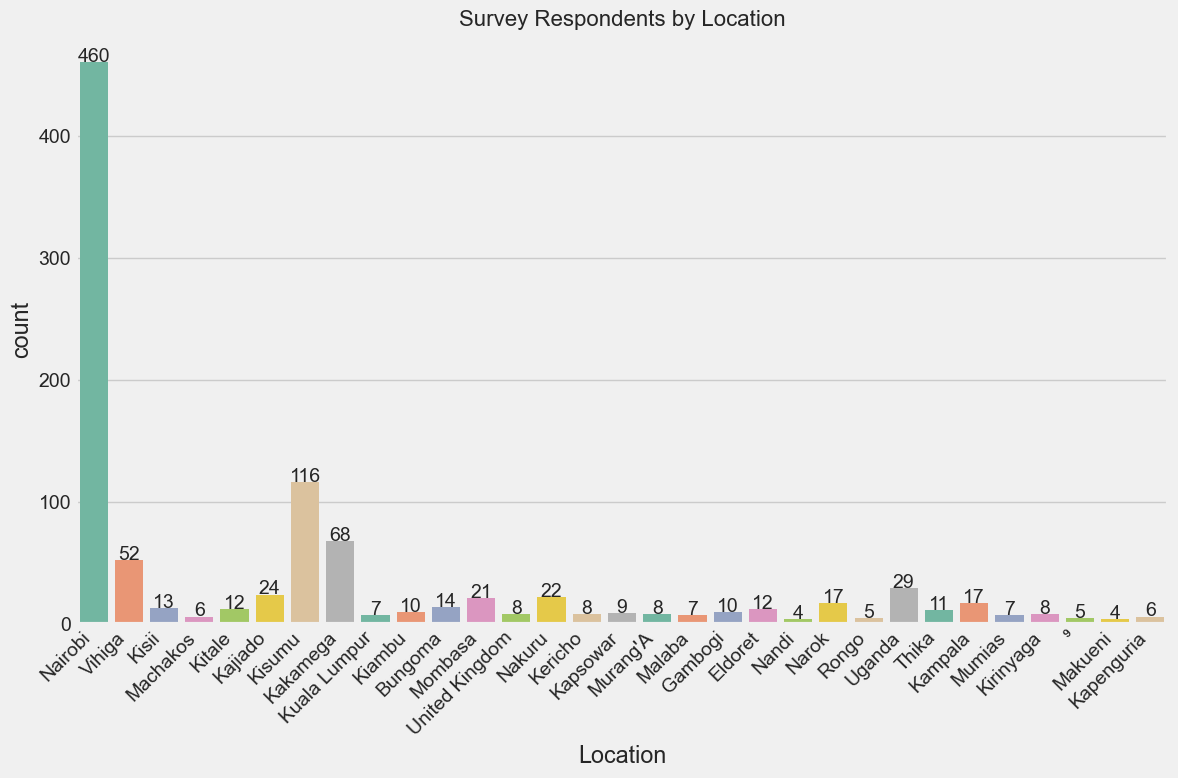

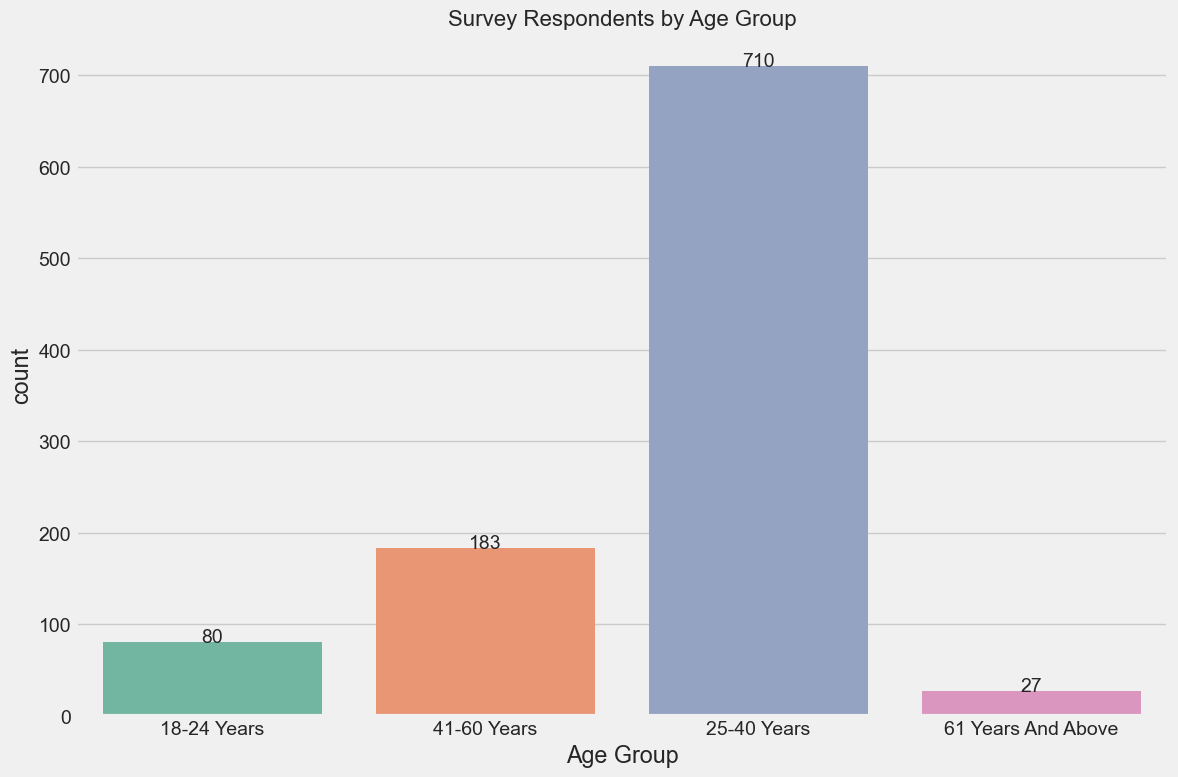

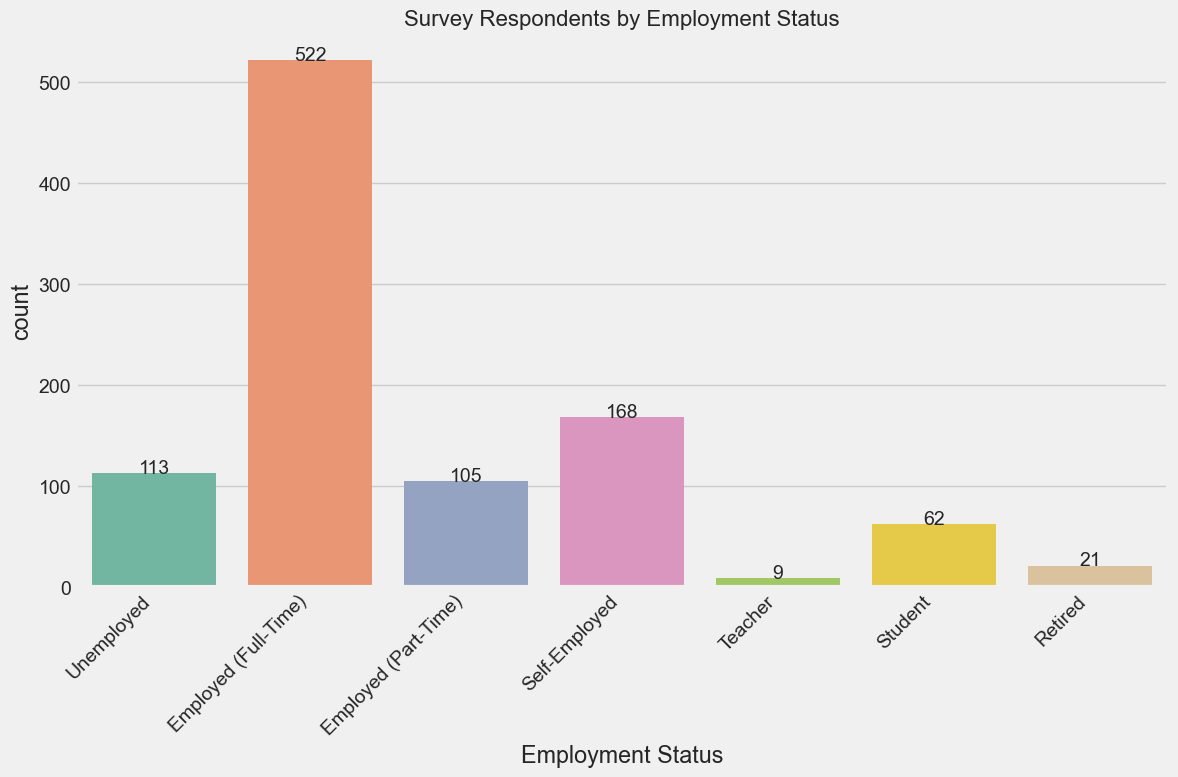

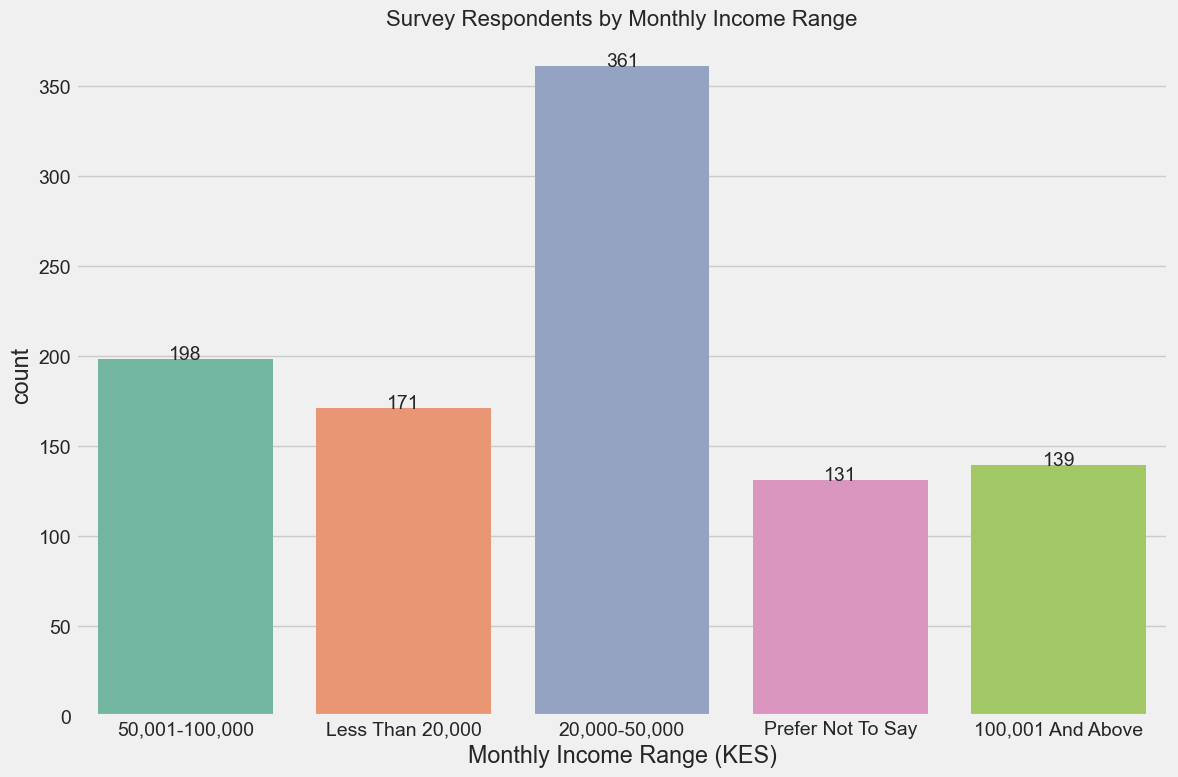

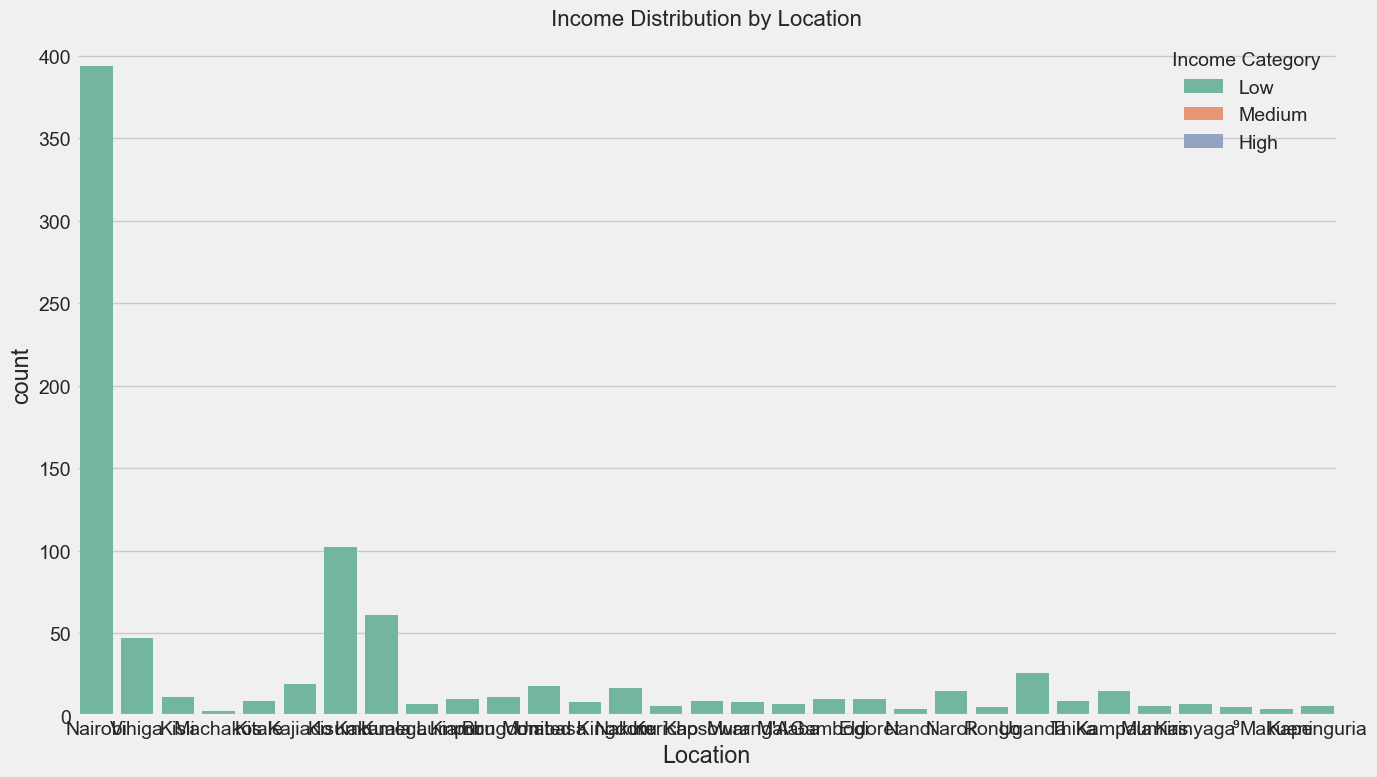

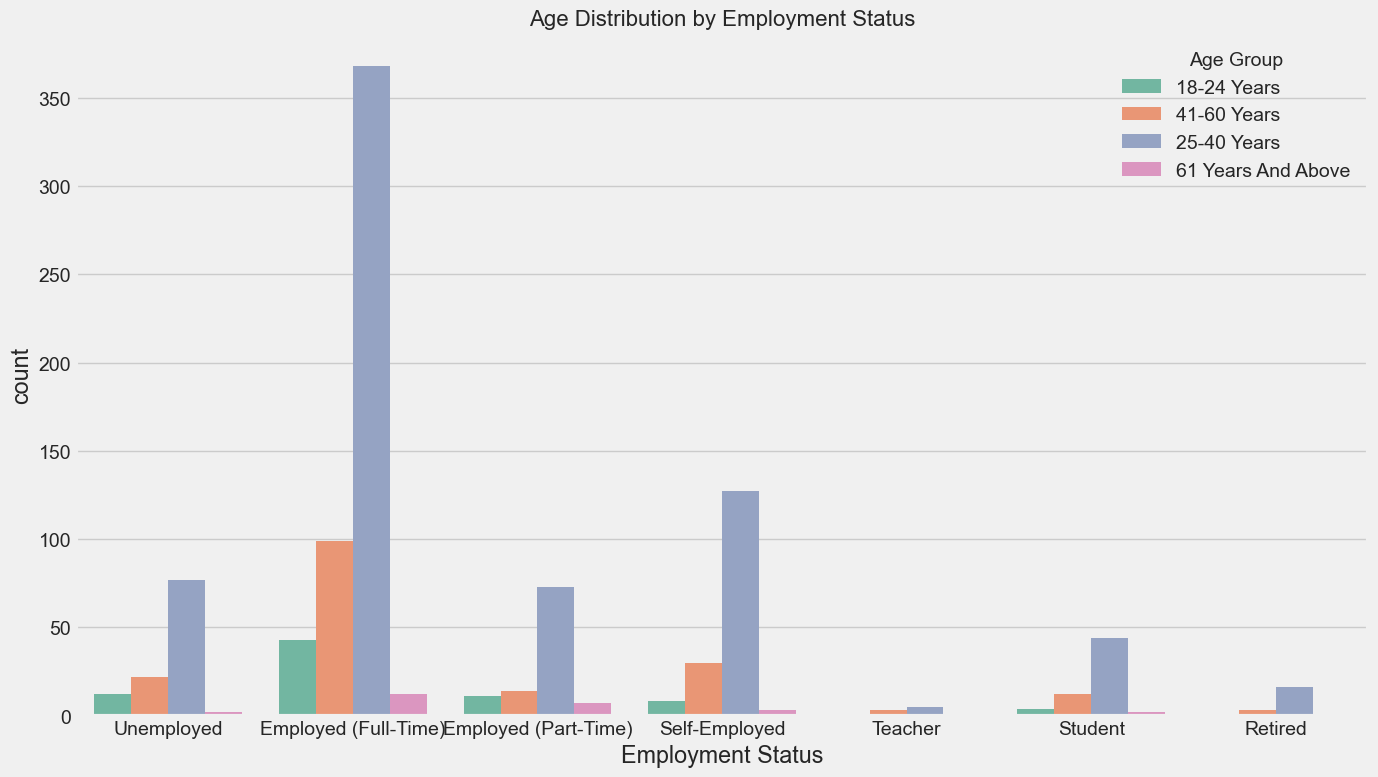

In [22]:

# Function to visualize categorical data
def plot_categorical(df, column, title=None, figsize=(12, 8), hue=None, palette='Set2'):
    """Create a countplot for categorical variables"""
    plt.figure(figsize=figsize)
    
    if hue:
        ax = sns.countplot(x=column, data=df, hue=hue, palette=palette)
    else:
        ax = sns.countplot(x=column, data=df, palette=palette)
    
    # Set title
    ax.set_title(title or f'Distribution of {column}', fontsize=16)
    
    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 0.1,
                f'{height:.0f}',
                ha="center")
    
    # Rotate x labels if many categories
    if len(df[column].unique()) > 5:
        plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    return ax

# Demographic analysis - Location
print("Demographics by Location:")
plot_categorical(cleaned_df, 'Location', title='Survey Respondents by Location')

# Demographic analysis - Age Group
print("\nDemographics by Age Group:")
plot_categorical(cleaned_df, 'Age Group', title='Survey Respondents by Age Group')

# Demographic analysis - Employment Status
print("\nDemographics by Employment Status:")
plot_categorical(cleaned_df, 'Employment Status', title='Survey Respondents by Employment Status')

# Demographic analysis - Income Range
print("\nDemographics by Income Range:")
plot_categorical(cleaned_df, 'Monthly Income Range (KES)', title='Survey Respondents by Monthly Income Range')

# Income by location
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Location', hue='Income Category', data=cleaned_df)
plt.title('Income Distribution by Location', fontsize=16)
plt.tight_layout()

# Age distribution by employment status
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Employment Status', hue='Age Group', data=cleaned_df)
plt.title('Age Distribution by Employment Status', fontsize=16)
plt.tight_layout()


Analysis of Primary Financial Goals:

Analysis of Financial Challenges:

Frequency of Seeking Financial Advice:


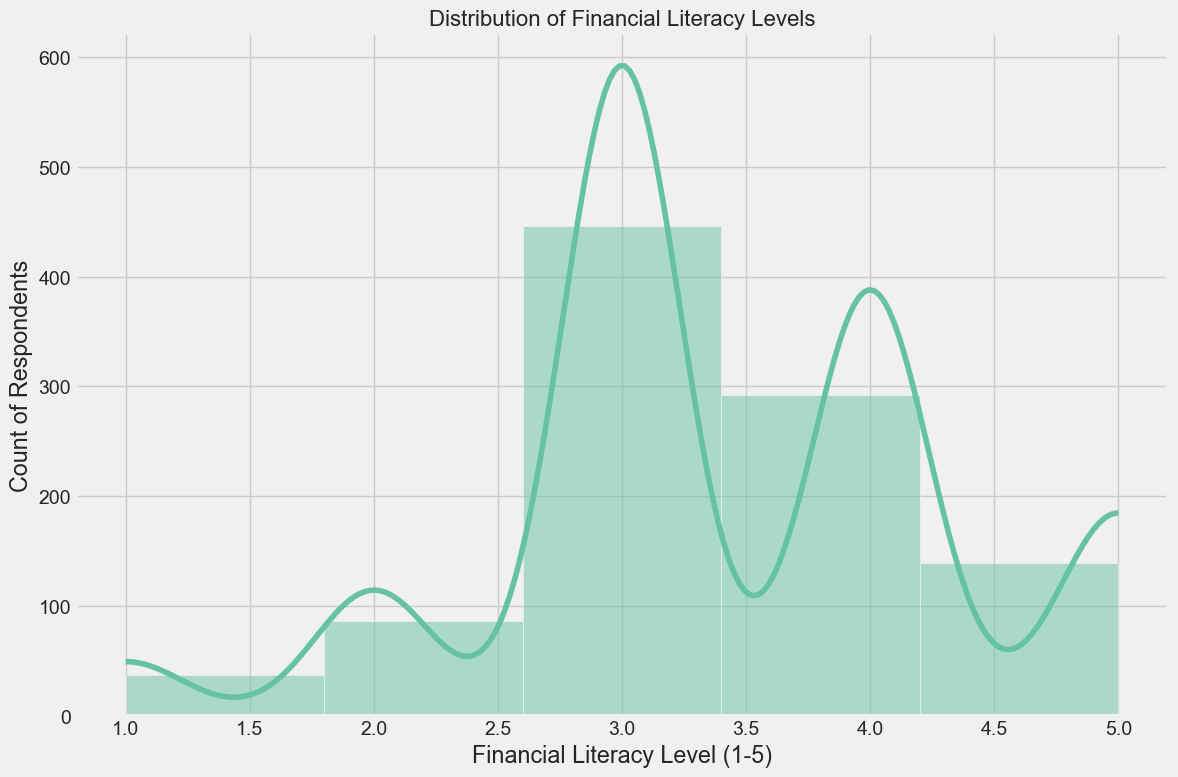

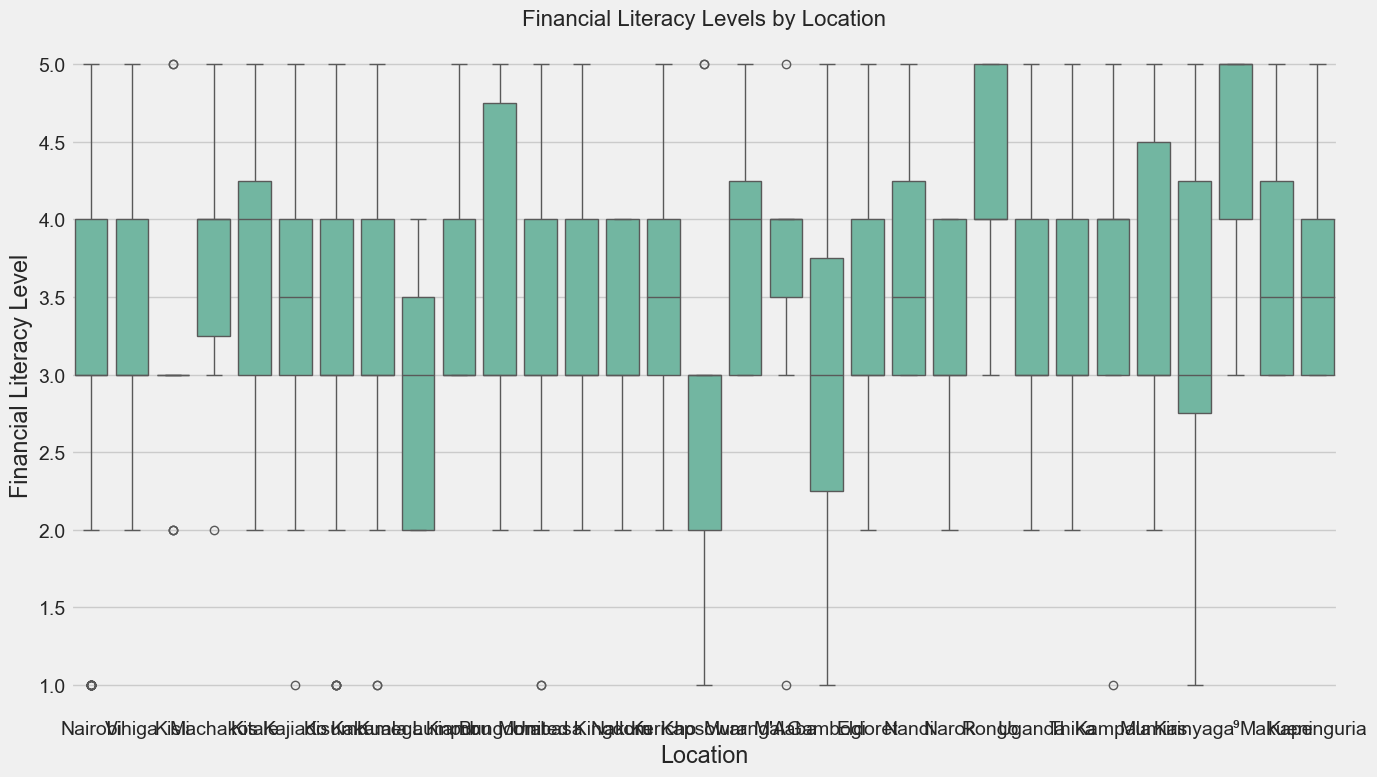

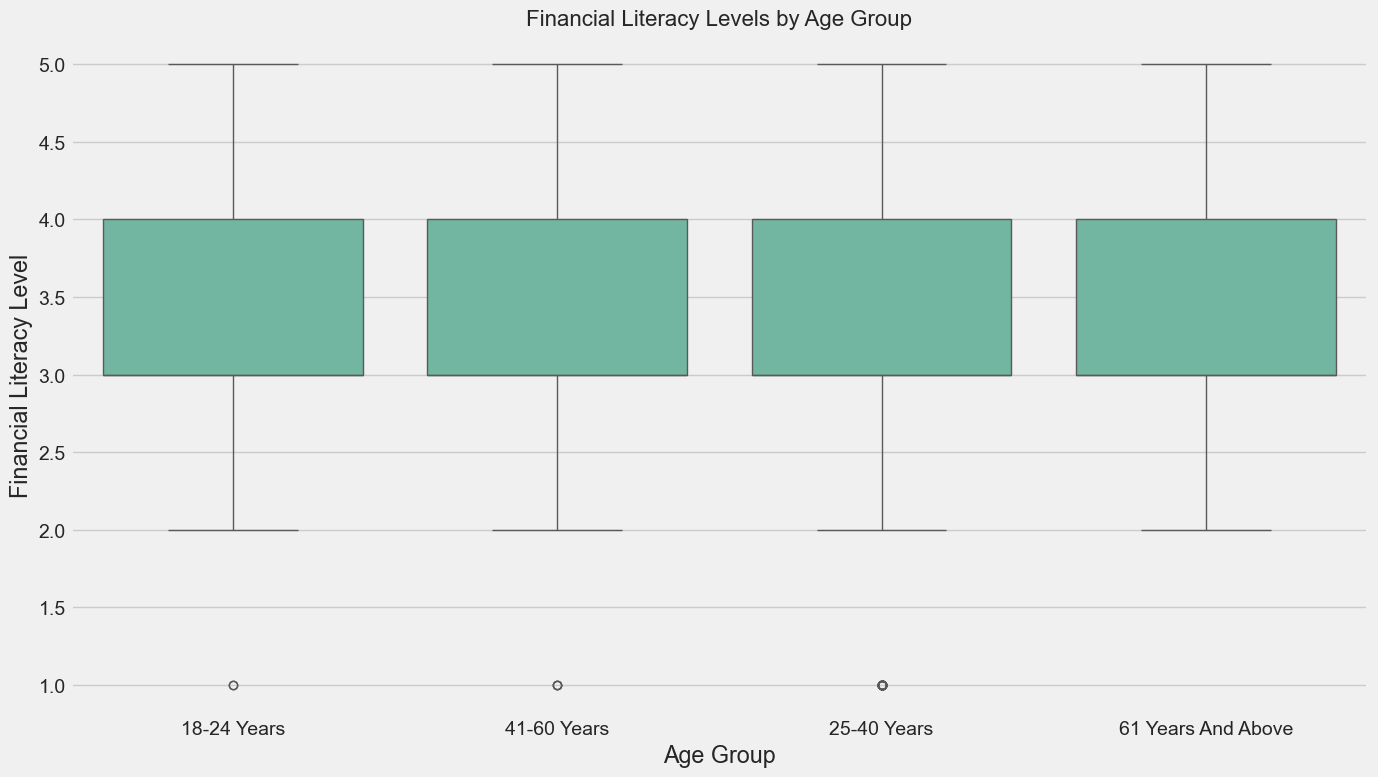

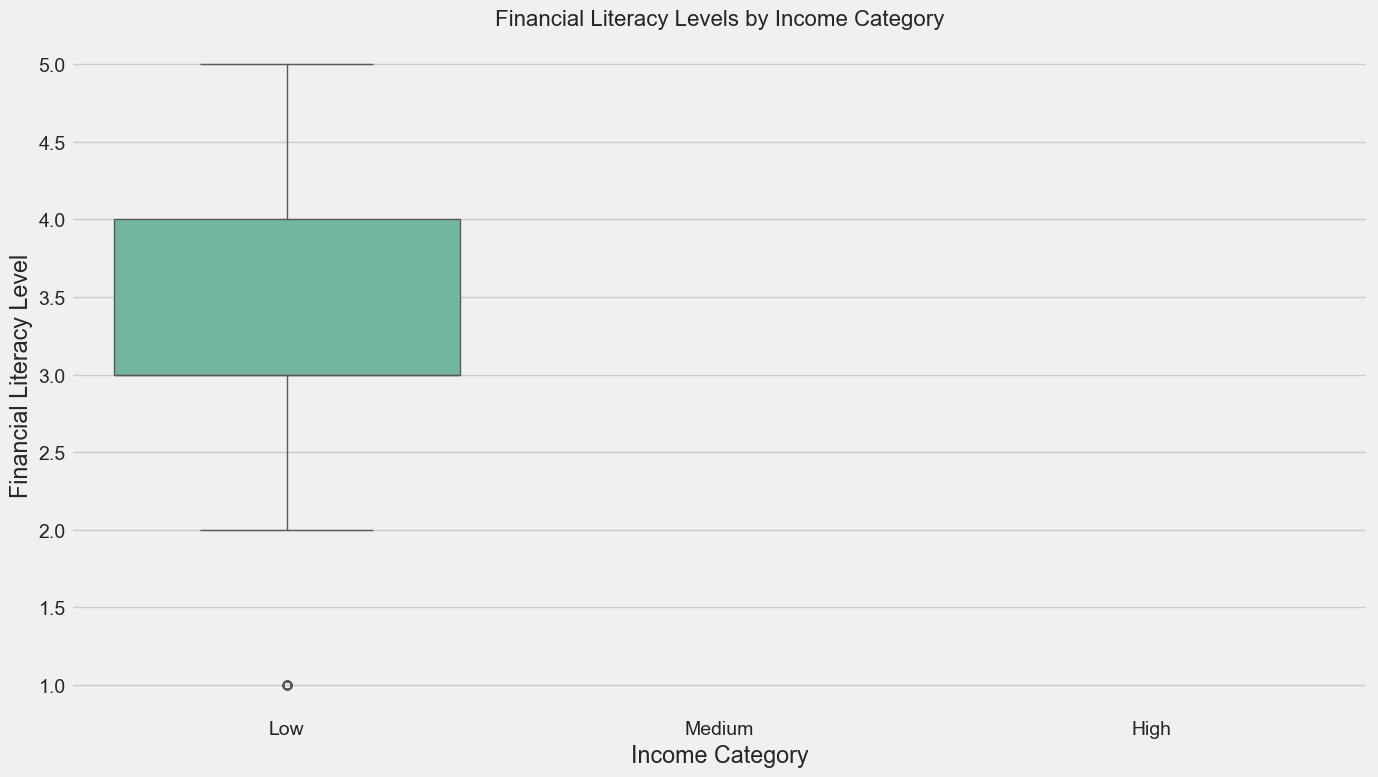

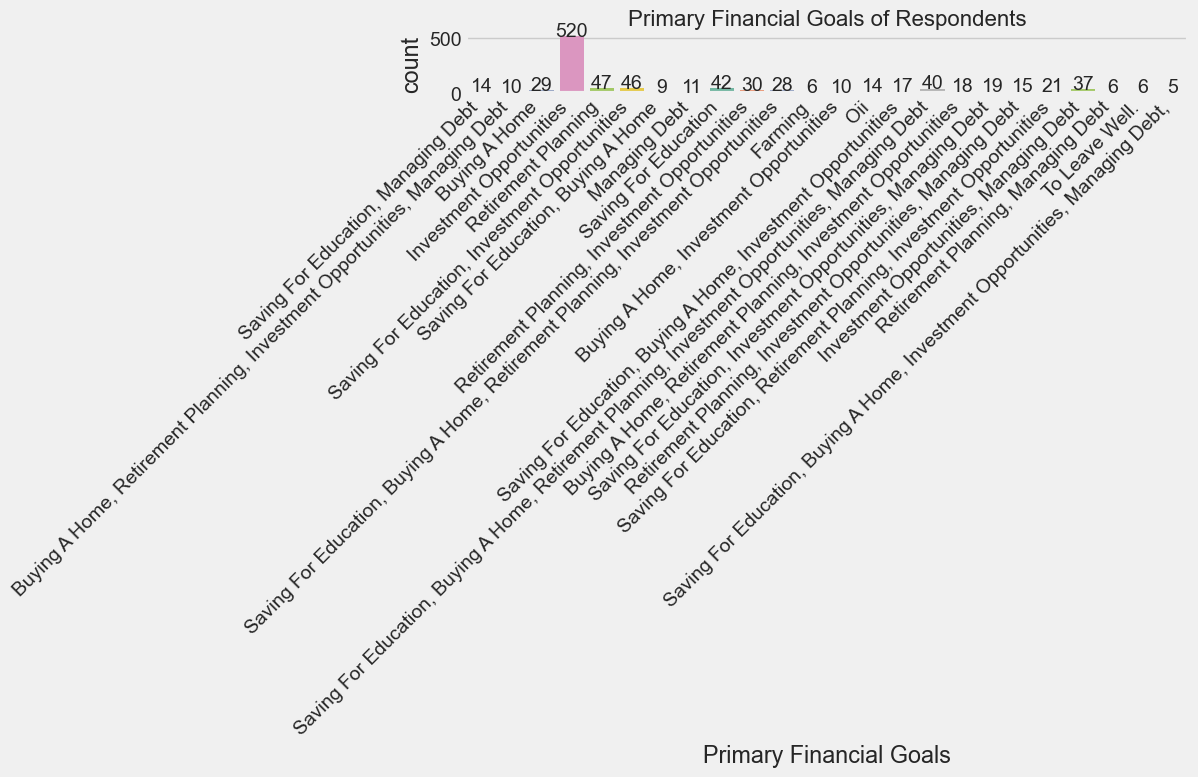

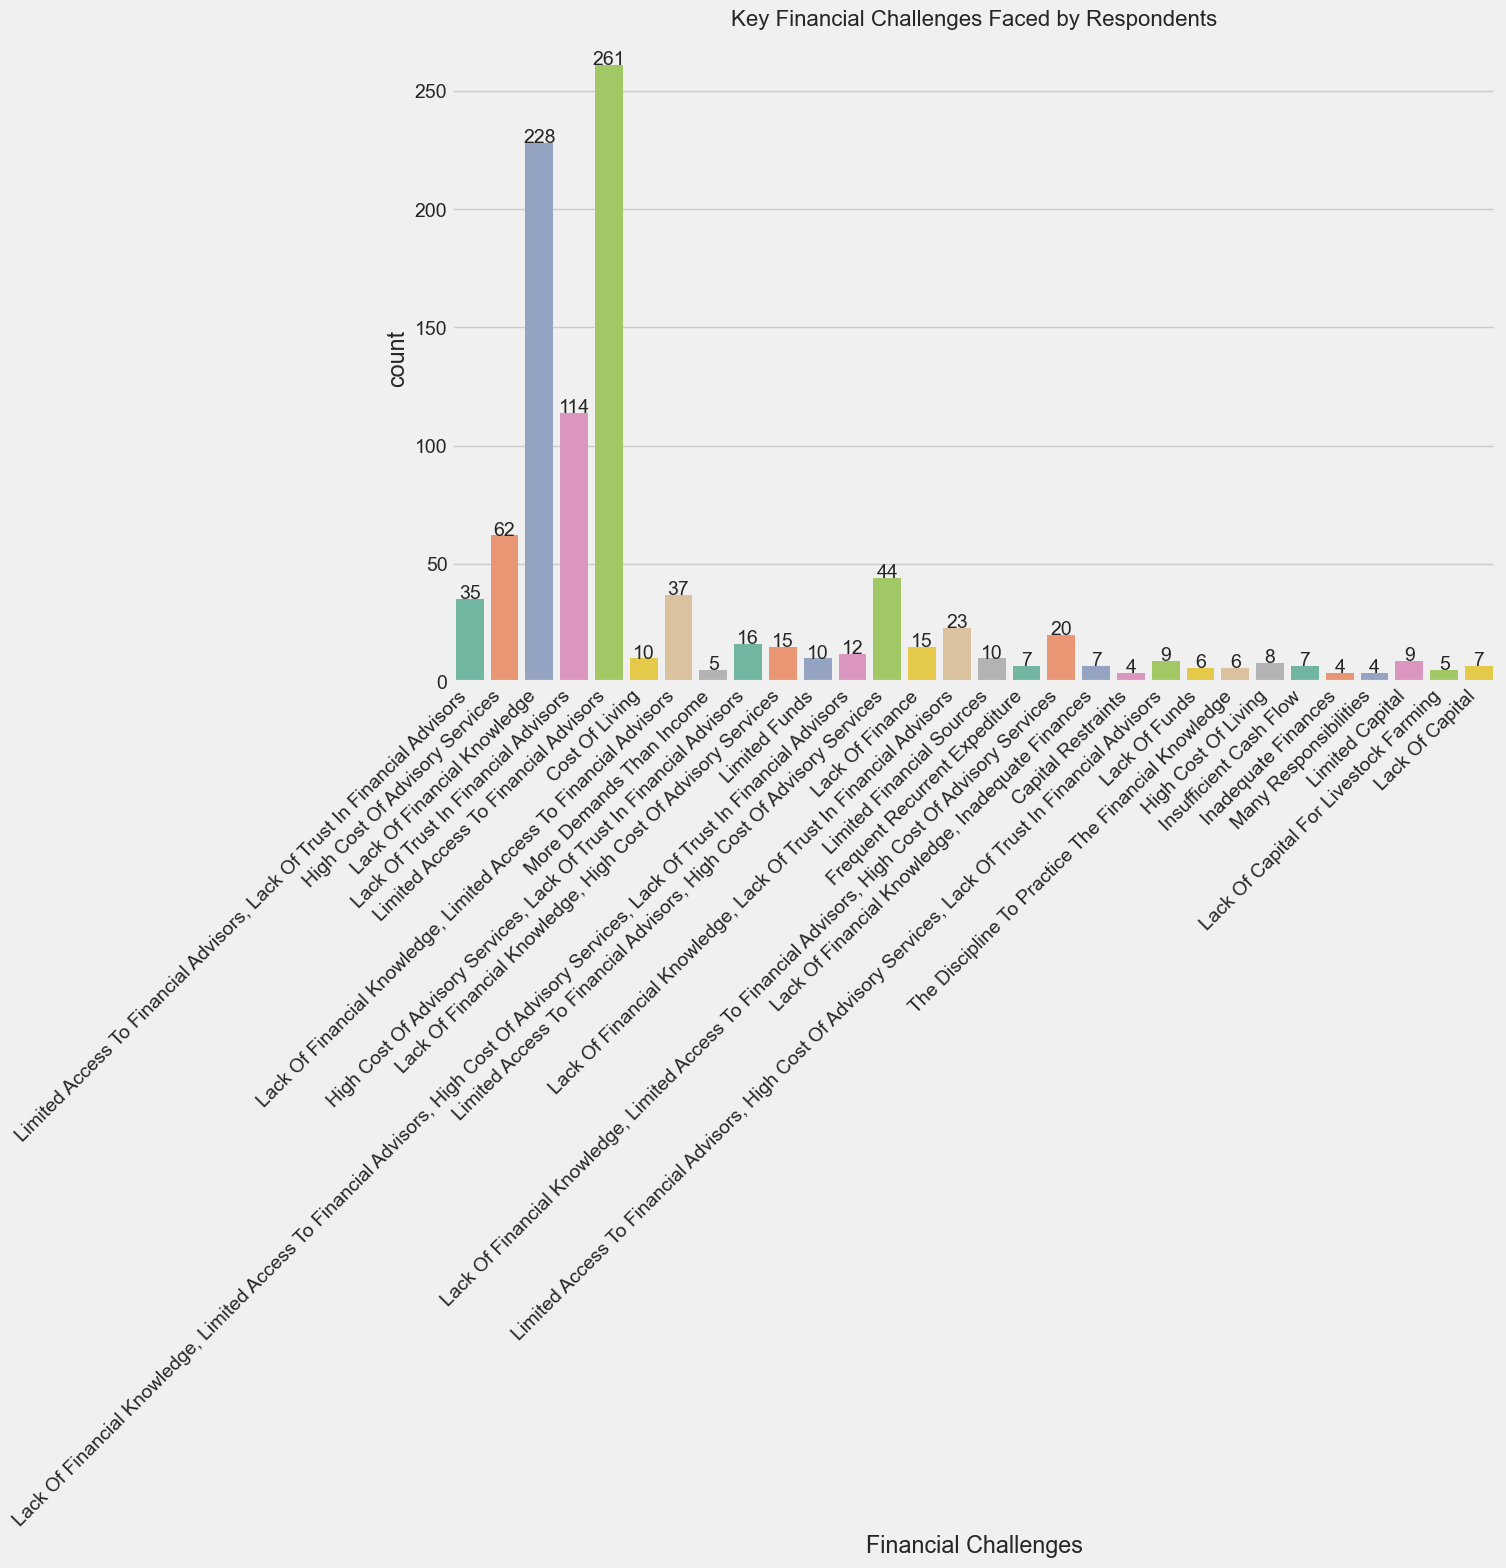

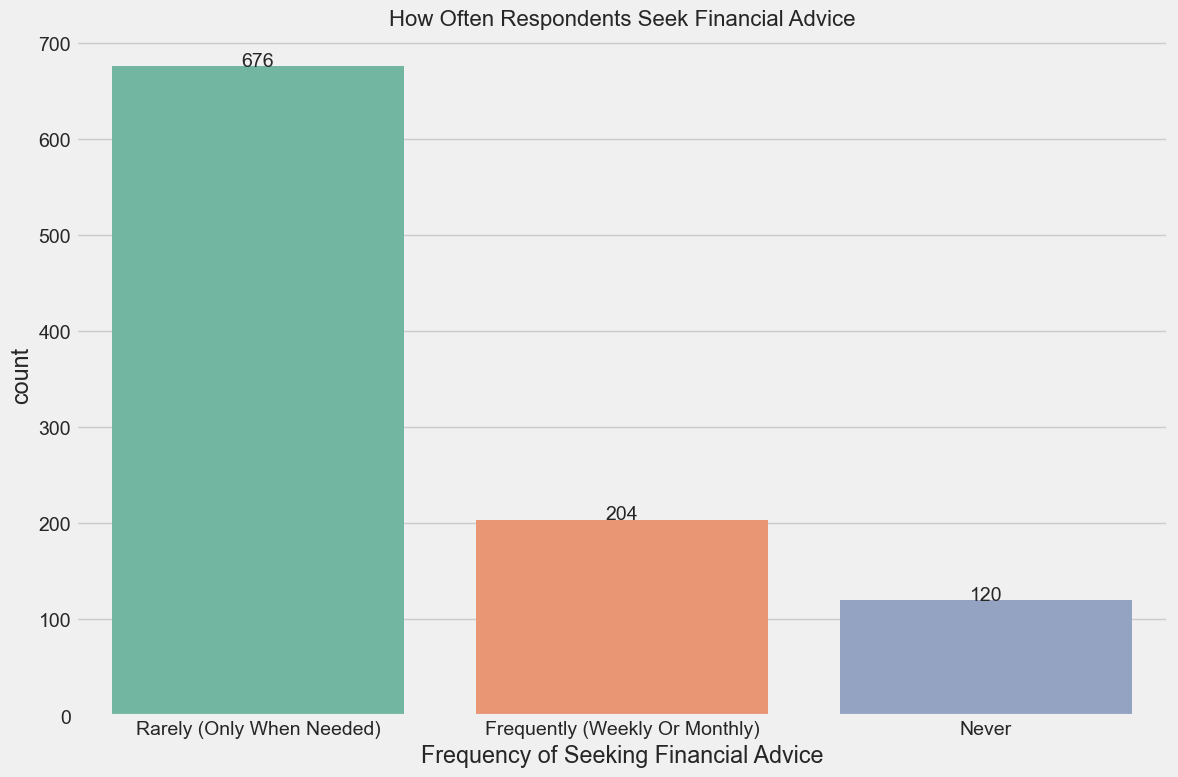

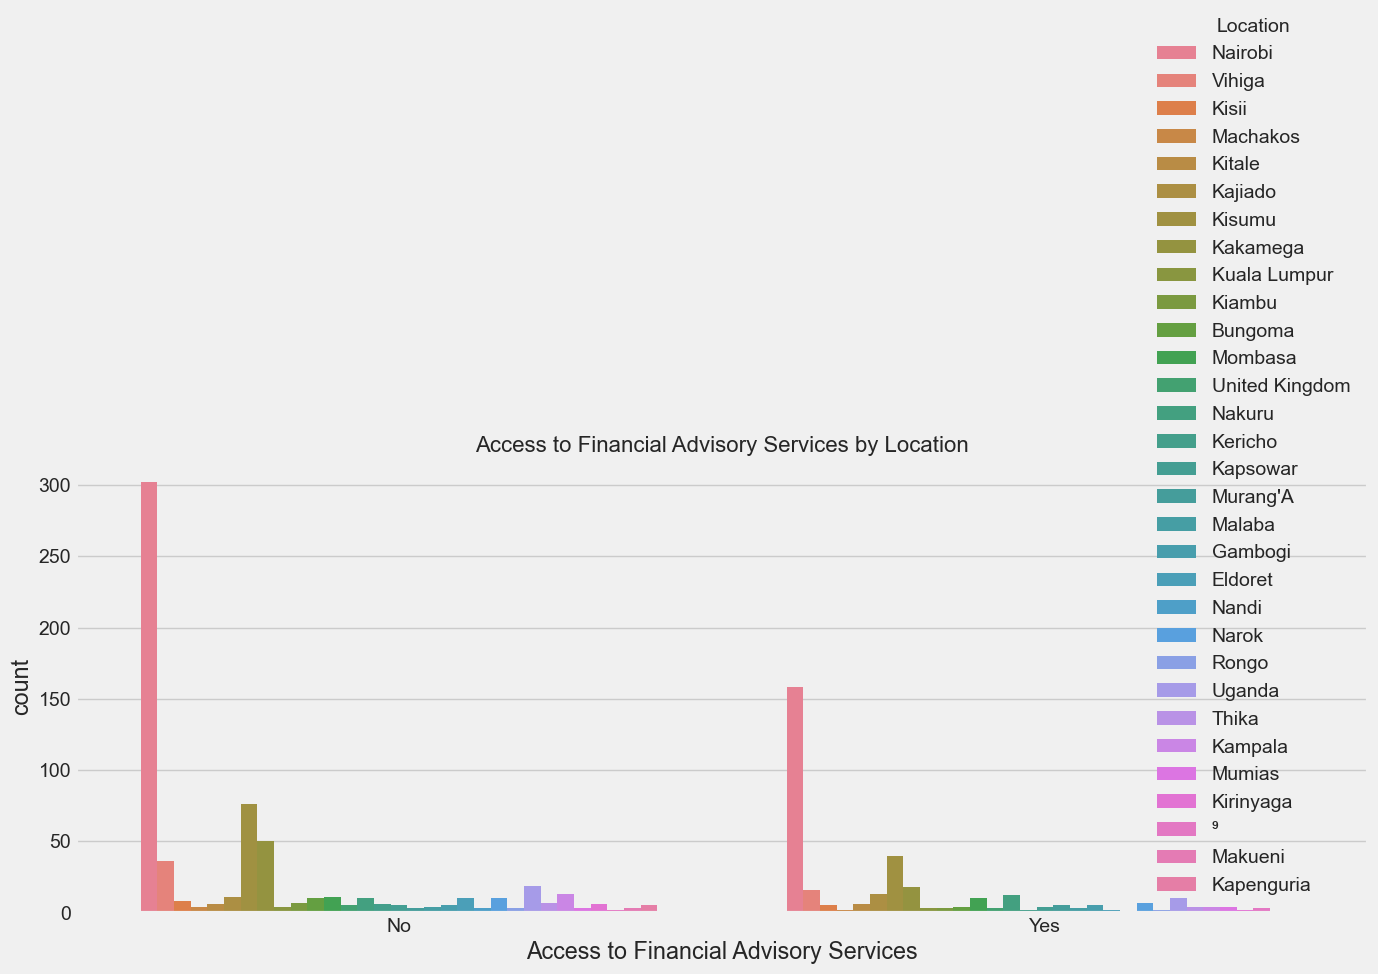

In [23]:
# Financial literacy distribution
plt.figure(figsize=(12, 8))
sns.histplot(data=cleaned_df, x='Financial Literacy Level', bins=5, kde=True)
plt.title('Distribution of Financial Literacy Levels', fontsize=16)
plt.xlabel('Financial Literacy Level (1-5)')
plt.ylabel('Count of Respondents')
plt.tight_layout()

# Financial literacy by location
plt.figure(figsize=(14, 8))
sns.boxplot(x='Location', y='Financial Literacy Level', data=cleaned_df)
plt.title('Financial Literacy Levels by Location', fontsize=16)
plt.tight_layout()

# Financial literacy by age group
plt.figure(figsize=(14, 8))
sns.boxplot(x='Age Group', y='Financial Literacy Level', data=cleaned_df)
plt.title('Financial Literacy Levels by Age Group', fontsize=16)
plt.tight_layout()

# Financial literacy by income
plt.figure(figsize=(14, 8))
sns.boxplot(x='Income Category', y='Financial Literacy Level', data=cleaned_df)
plt.title('Financial Literacy Levels by Income Category', fontsize=16)
plt.tight_layout()

# Primary financial goals
print("\nAnalysis of Primary Financial Goals:")
plot_categorical(cleaned_df, 'Primary Financial Goals', title='Primary Financial Goals of Respondents')

# Financial challenges
print("\nAnalysis of Financial Challenges:")
plot_categorical(cleaned_df, 'Financial Challenges', title='Key Financial Challenges Faced by Respondents')

# Frequency of seeking financial advice
print("\nFrequency of Seeking Financial Advice:")
plot_categorical(cleaned_df, 'Frequency of Seeking Financial Advice', title='How Often Respondents Seek Financial Advice')

# Access to financial advisory services
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Access to Financial Advisory Services', hue='Location', data=cleaned_df)
plt.title('Access to Financial Advisory Services by Location', fontsize=16)
plt.tight_layout()


Analysis of Interest in AI-powered Chatbot:

Comfort with Digital Financial Planning:


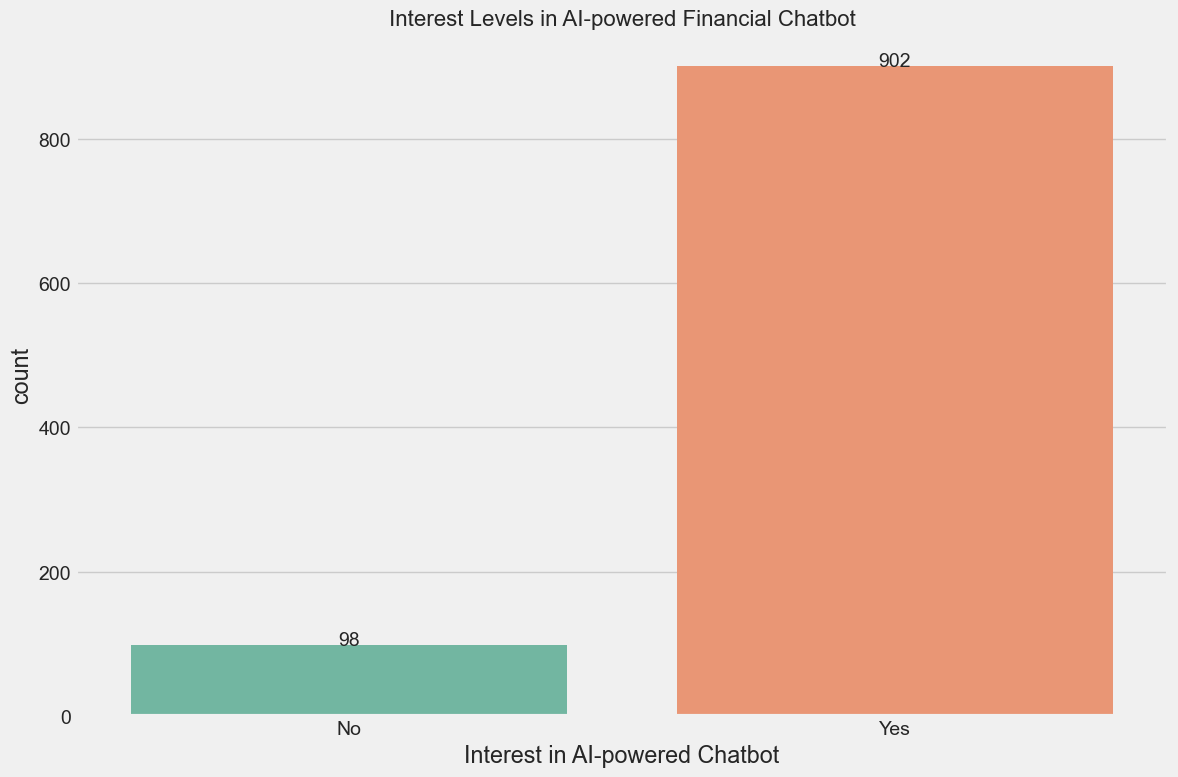

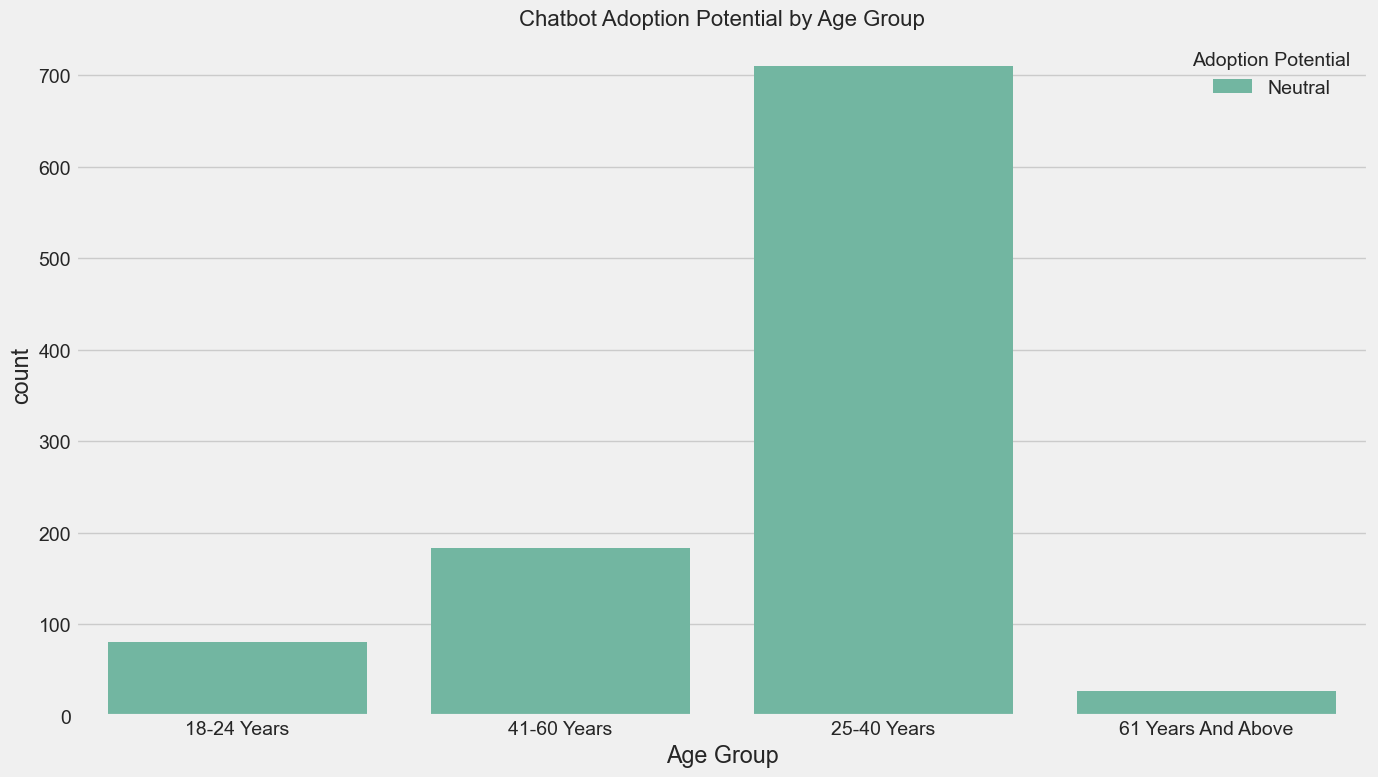

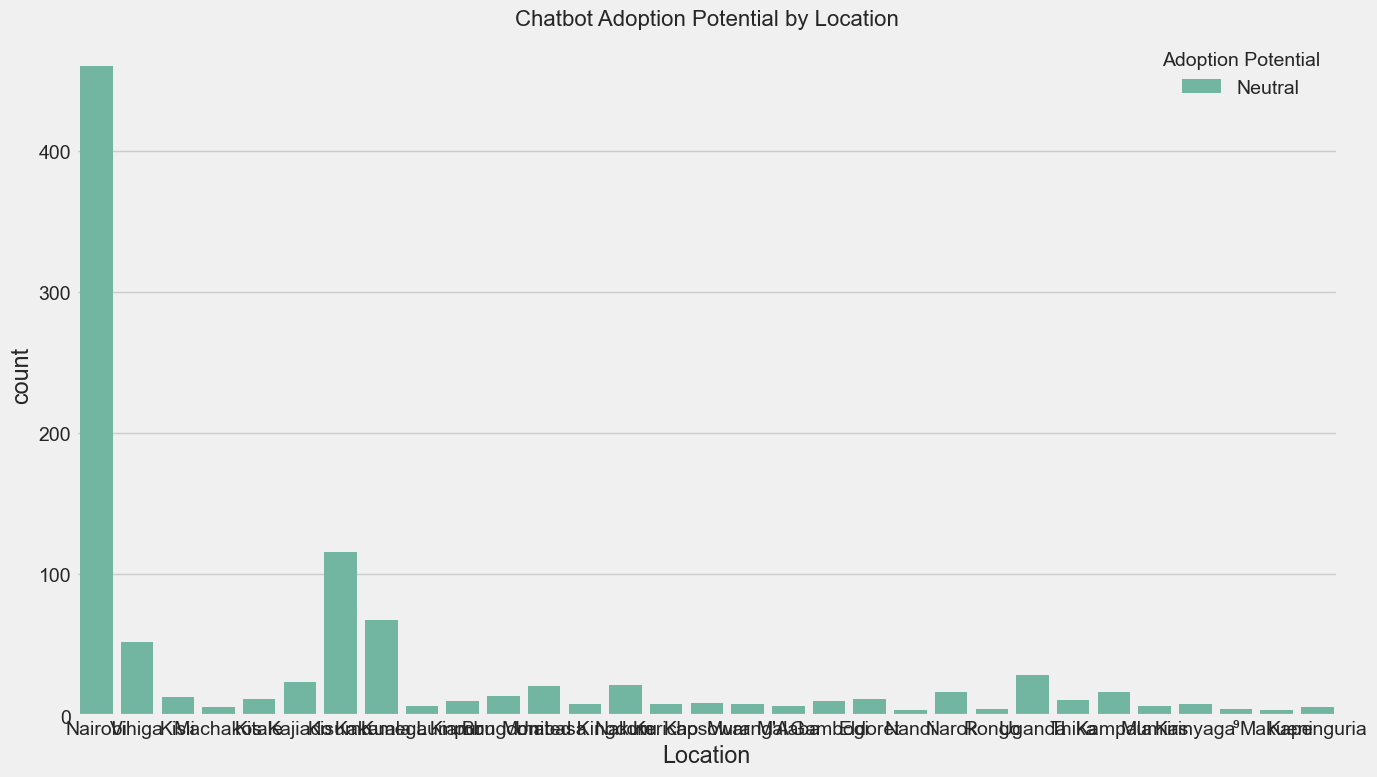

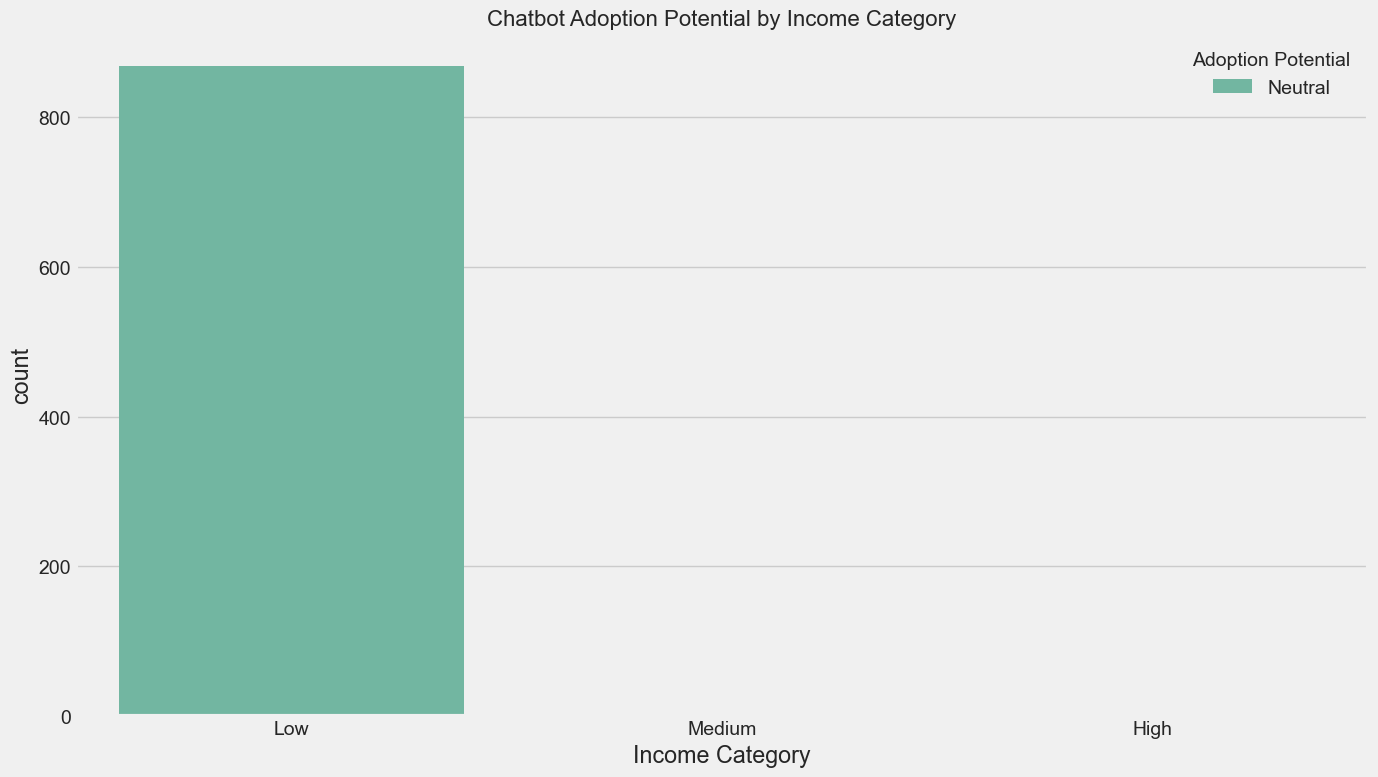

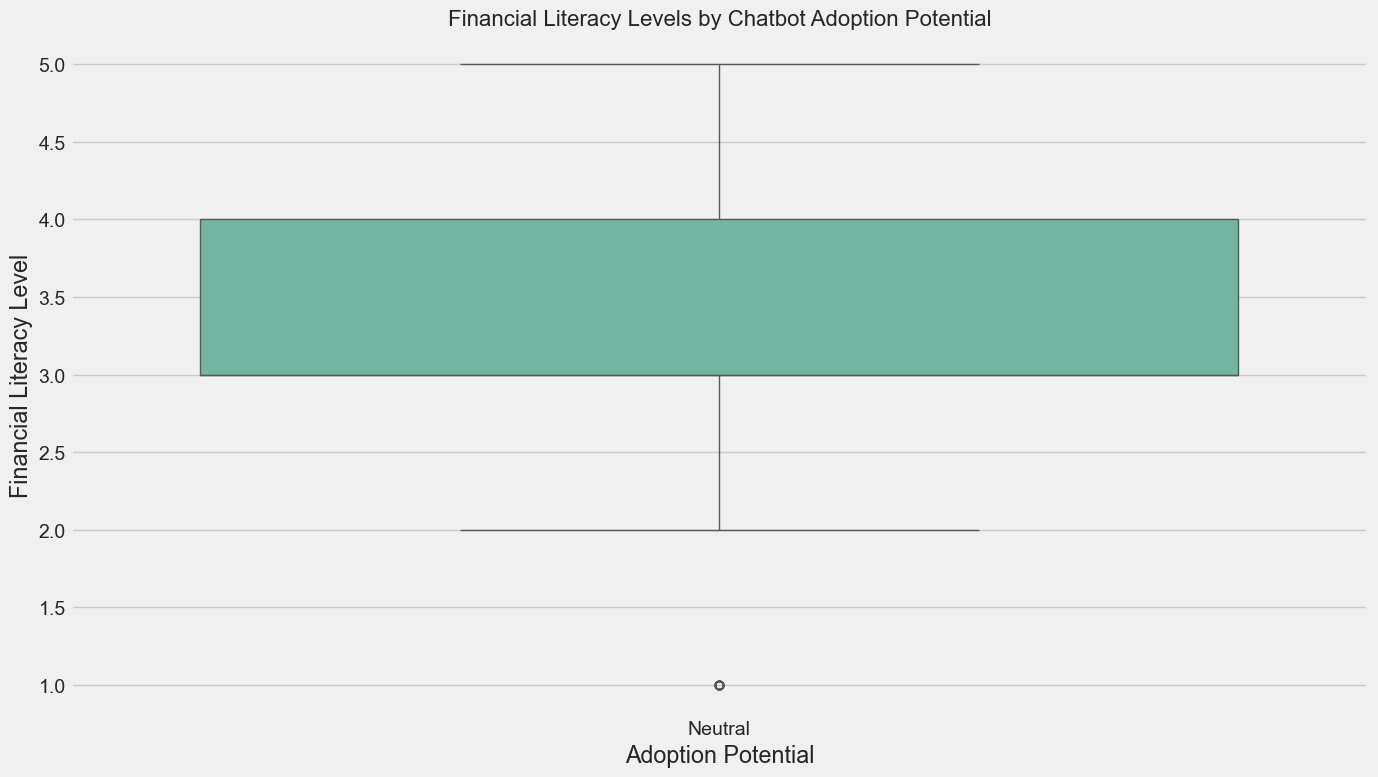

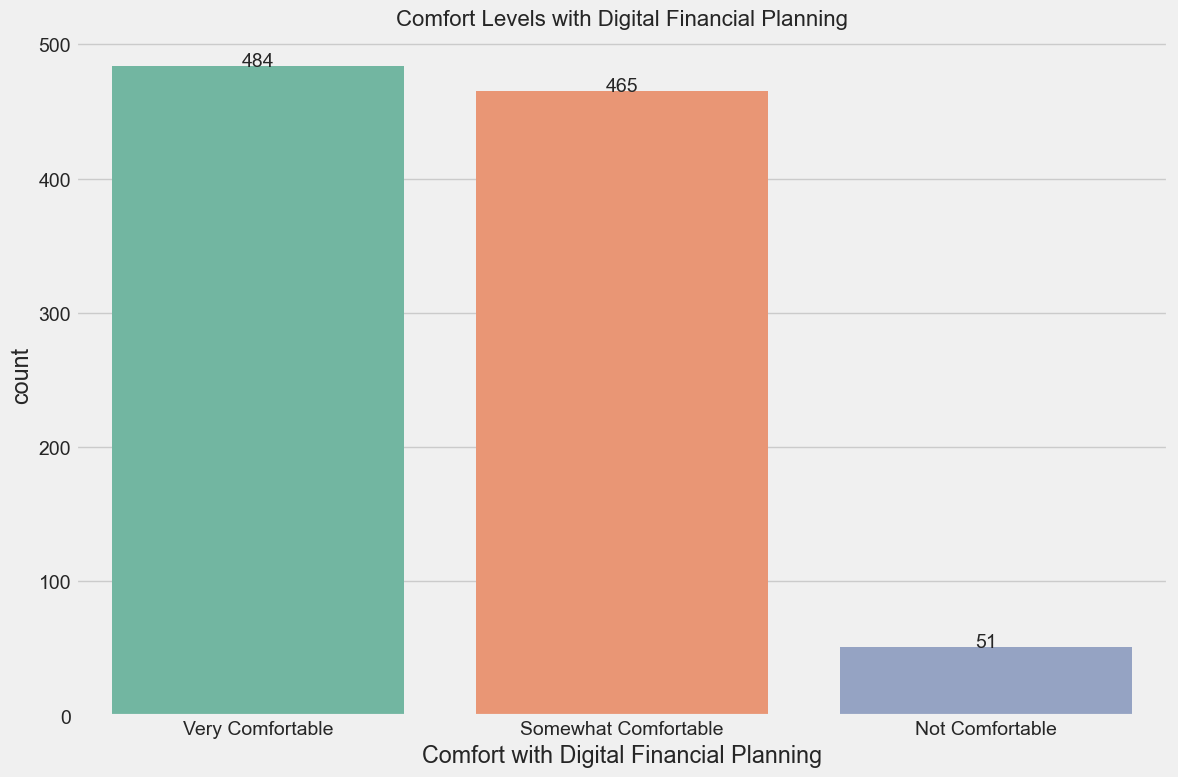

<Figure size 1400x1000 with 0 Axes>

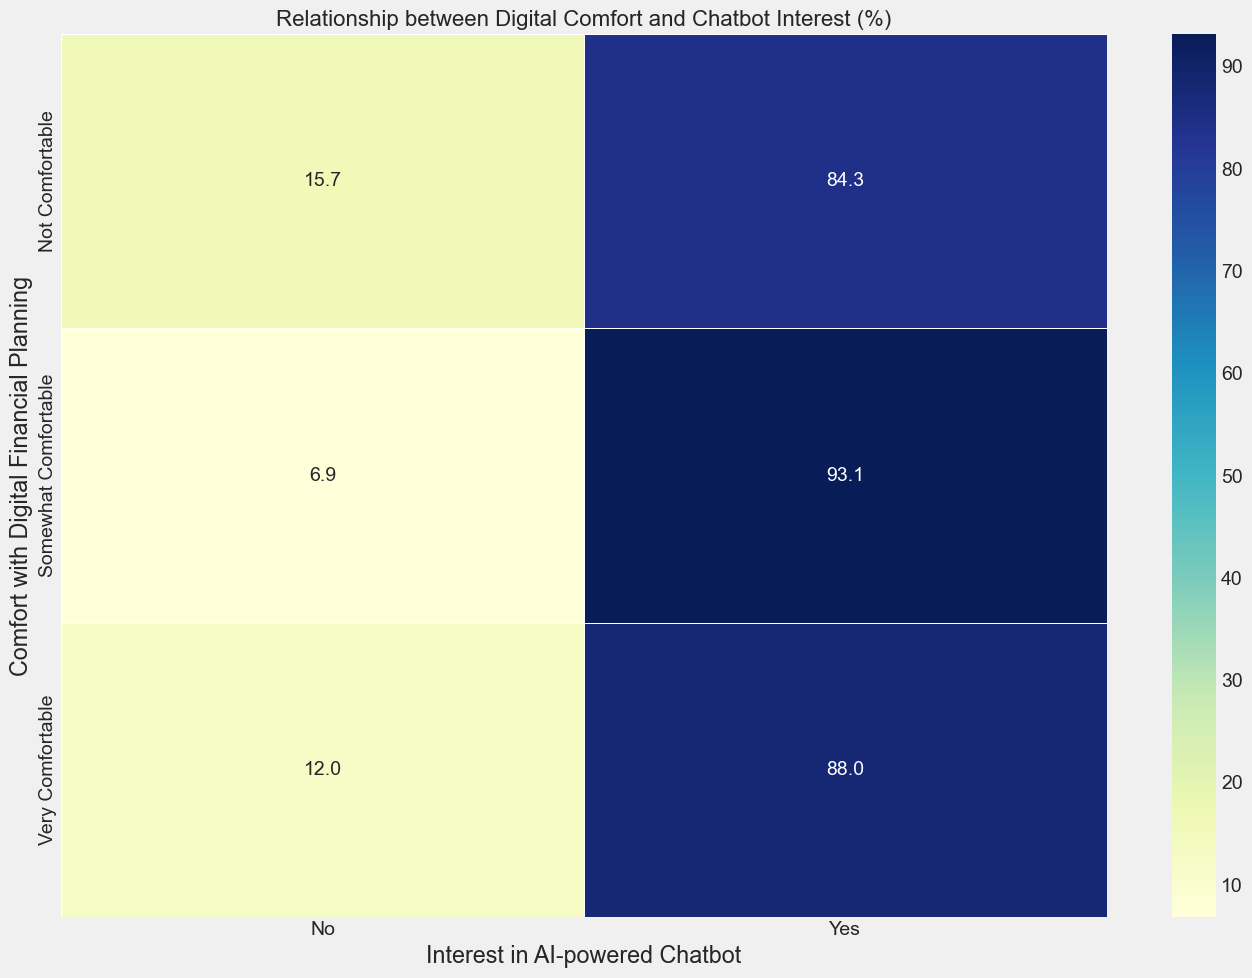

In [24]:
# Interest in AI-powered chatbot
print("\nAnalysis of Interest in AI-powered Chatbot:")
plot_categorical(cleaned_df, 'Interest in AI-powered Chatbot', title='Interest Levels in AI-powered Financial Chatbot')

# Create a binary adoption potential variable
if 'Interest in AI-powered Chatbot' in cleaned_df.columns:
    # Classify "Very interested" and "Somewhat interested" as Positive
    cleaned_df['Adoption Potential'] = cleaned_df['Interest in AI-powered Chatbot'].apply(
        lambda x: 'Positive' if any(term in x for term in ['Very', 'Somewhat']) and 'Un' not in x 
        else 'Negative' if any(term in x for term in ['Not', 'Un']) 
        else 'Neutral'
    )

# Analyze interest by demographics
plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Age Group', hue='Adoption Potential', data=cleaned_df)
plt.title('Chatbot Adoption Potential by Age Group', fontsize=16)
plt.tight_layout()

plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Location', hue='Adoption Potential', data=cleaned_df)
plt.title('Chatbot Adoption Potential by Location', fontsize=16)
plt.tight_layout()

plt.figure(figsize=(14, 8))
ax = sns.countplot(x='Income Category', hue='Adoption Potential', data=cleaned_df)
plt.title('Chatbot Adoption Potential by Income Category', fontsize=16)
plt.tight_layout()

# Financial literacy and chatbot interest
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='Adoption Potential', y='Financial Literacy Level', data=cleaned_df)
plt.title('Financial Literacy Levels by Chatbot Adoption Potential', fontsize=16)
plt.tight_layout()

# Comfort with digital financial planning
print("\nComfort with Digital Financial Planning:")
plot_categorical(cleaned_df, 'Comfort with Digital Financial Planning', title='Comfort Levels with Digital Financial Planning')

# Relationship between digital comfort and chatbot interest
if all(col in cleaned_df.columns for col in ['Comfort with Digital Financial Planning', 'Interest in AI-powered Chatbot']):
    plt.figure(figsize=(14, 10))
    digital_comfort_order = ['Very Uncomfortable', 'Somewhat Uncomfortable', 'Neutral', 
                             'Somewhat Comfortable', 'Very Comfortable']
    interest_order = ['Not Interested', 'Somewhat Uninterested', 'Neutral', 
                       'Somewhat Interested', 'Very Interested']
    
    # Create a crosstab
    ct = pd.crosstab(cleaned_df['Comfort with Digital Financial Planning'], 
                     cleaned_df['Interest in AI-powered Chatbot'])
    
    # Convert to percentages
    ct_pct = ct.div(ct.sum(axis=1), axis=0) * 100
    
    # Plot heatmap
    plt.figure(figsize=(14, 10))
    sns.heatmap(ct_pct, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5)
    plt.title('Relationship between Digital Comfort and Chatbot Interest (%)', fontsize=16)
    plt.tight_layout()


 Available Columns: Index(['Timestamp', 'Location', 'Age Group', 'Employment Status', '  What is your primary source of income?  ', 'Monthly Income Range (KES)', 'Access to Financial Advisory Services', 'Financial Literacy Level', 'Primary Financial Goals', 'Financial Challenges', 'Frequency of Seeking Financial Advice', 'Which financial advisory services have you used before?  ', 'Interest in AI-powered Chatbot', 'Preferred Chatbot Features', 'Trust Factors for Chatbots', 'Comfort with Digital Financial Planning', 'What concerns would you have about using a financial chatbot?  ', 'Additional Features Requested', 'Other Comments', 'Literacy Category', 'Income Ordinal', 'Income Category', 'Adoption Potential'], dtype='object')

 Preferred Chatbot Features:


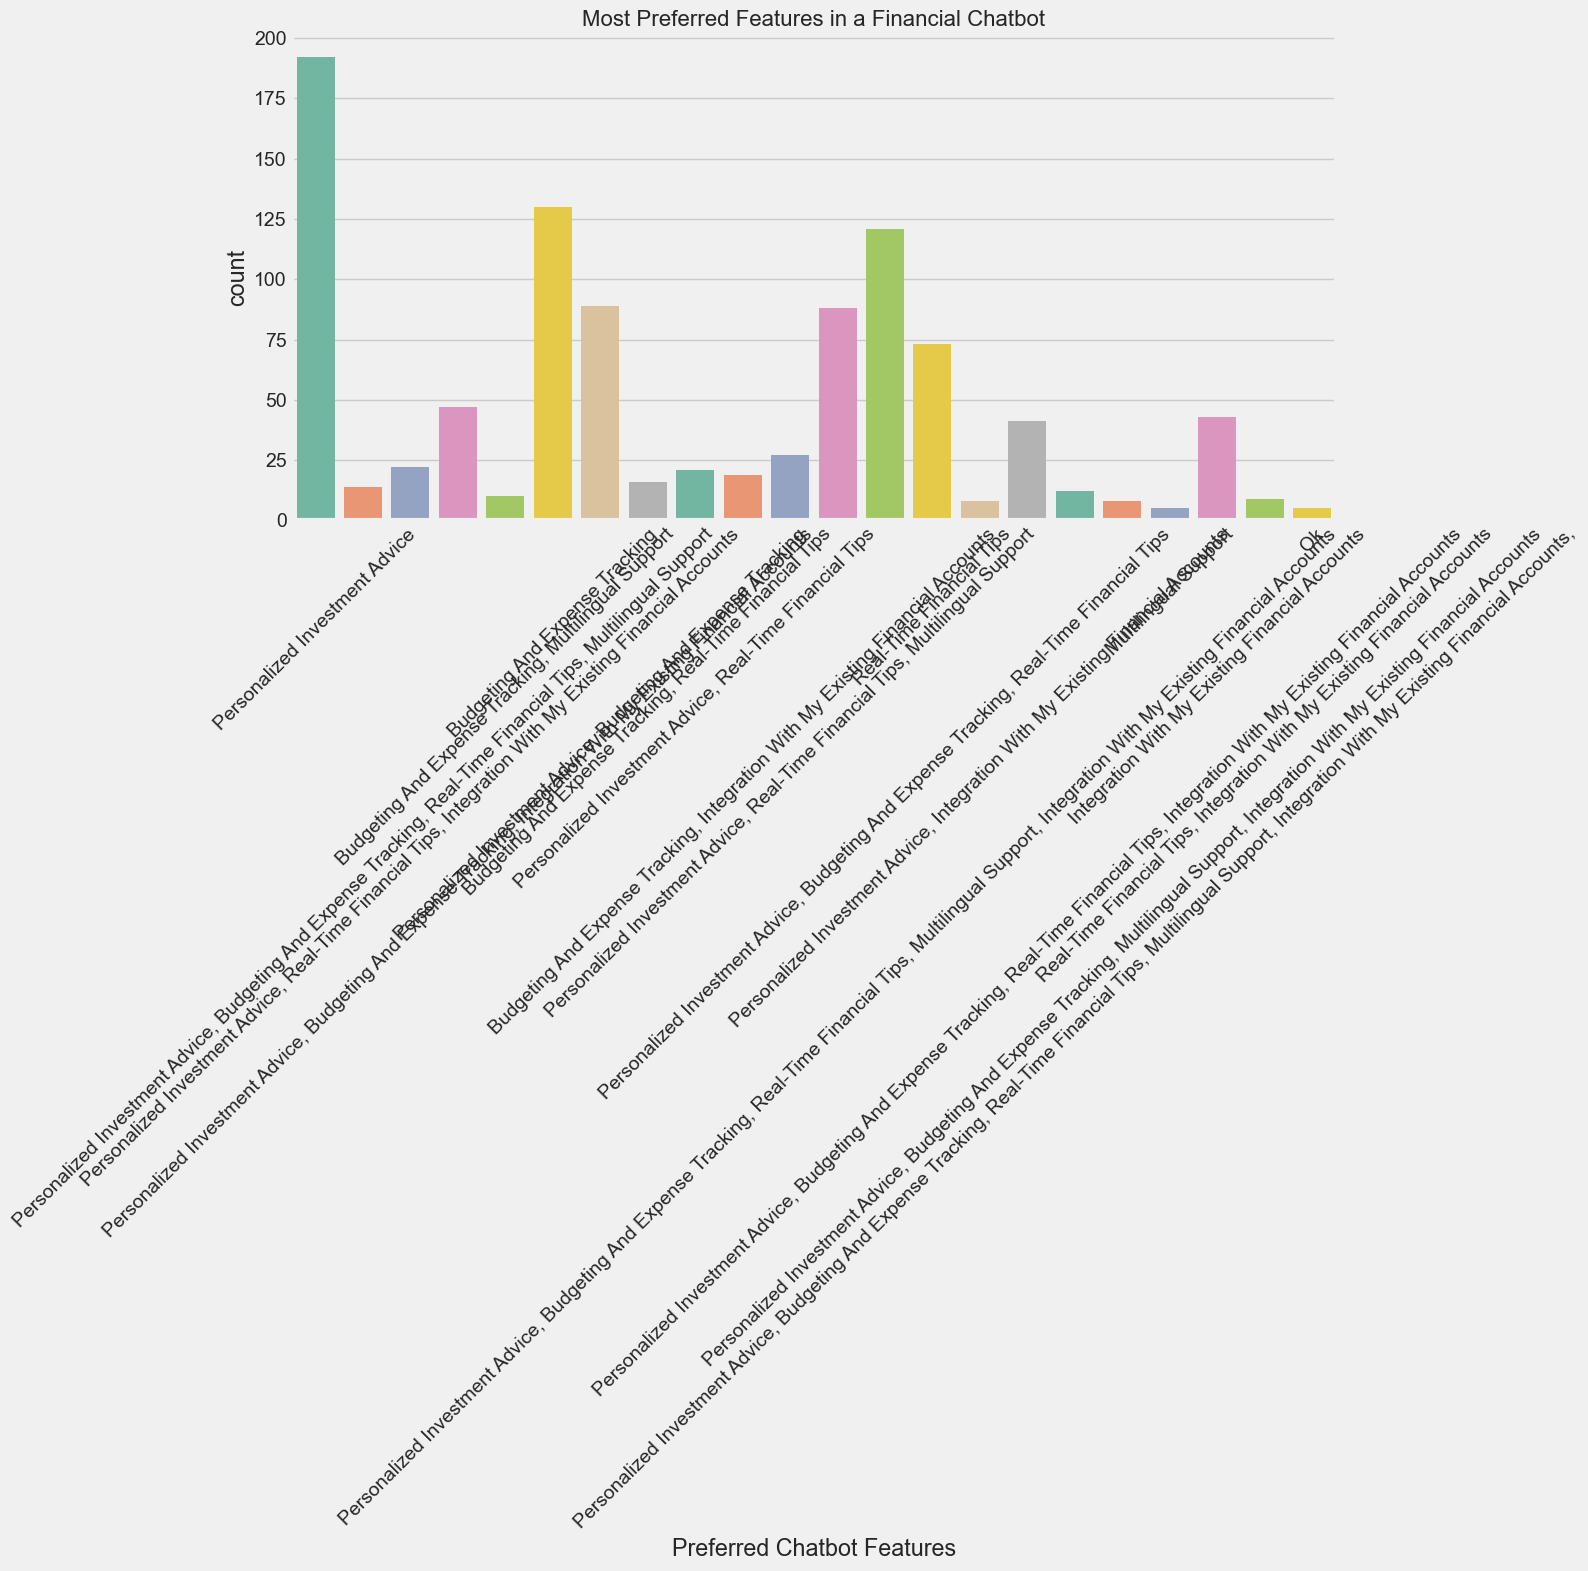


 Trust Factors for Chatbots:


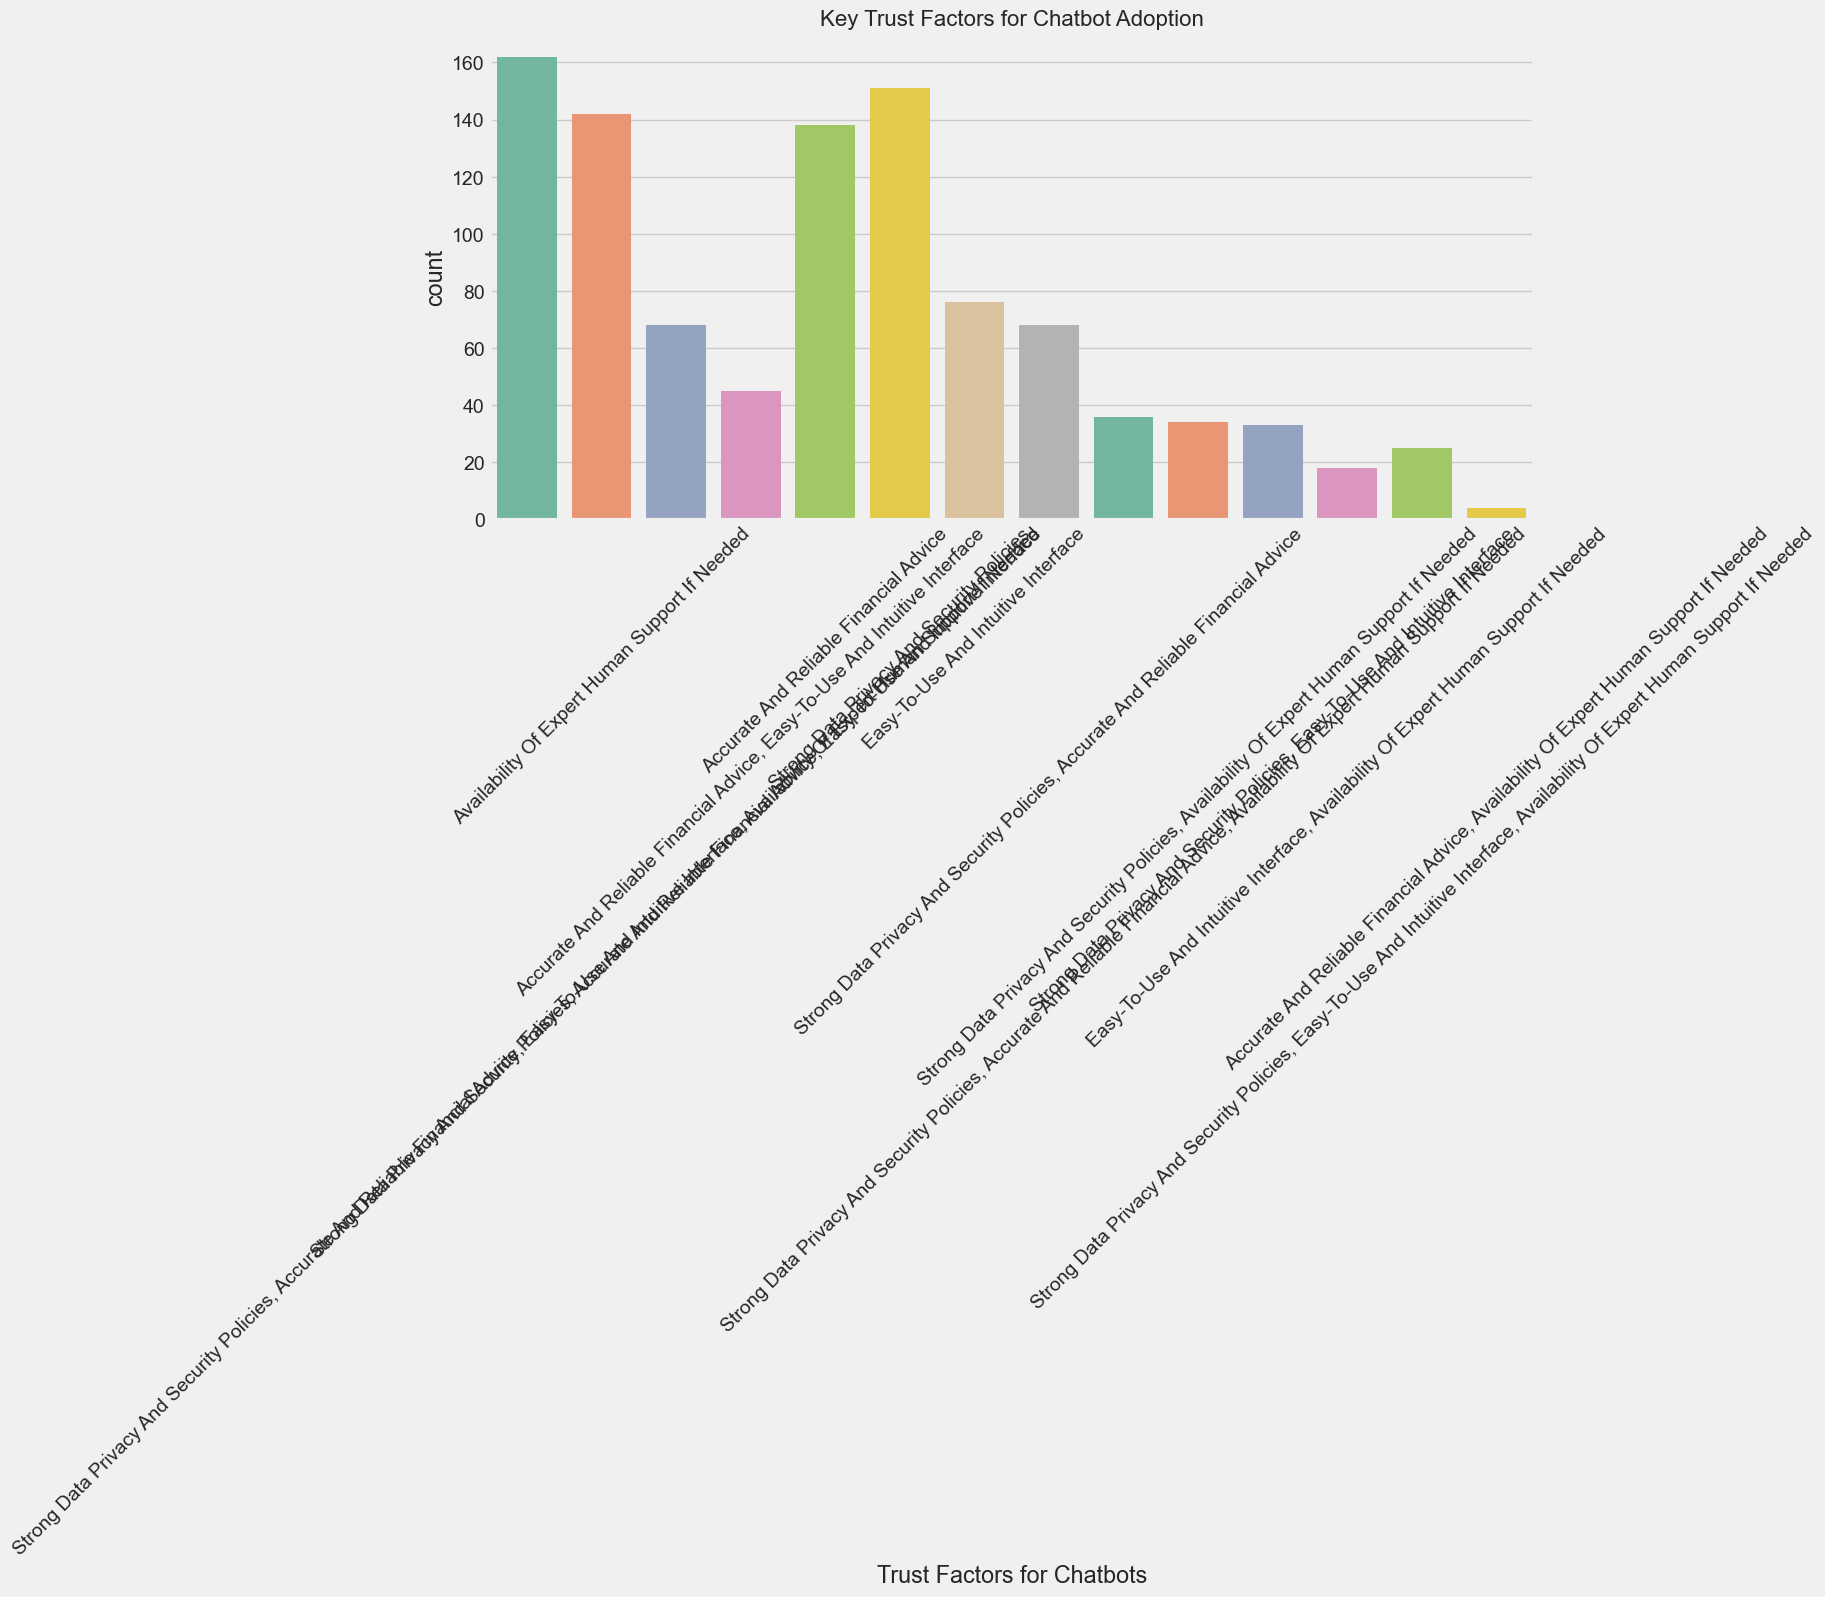


 Concerns About Using Financial Chatbot:


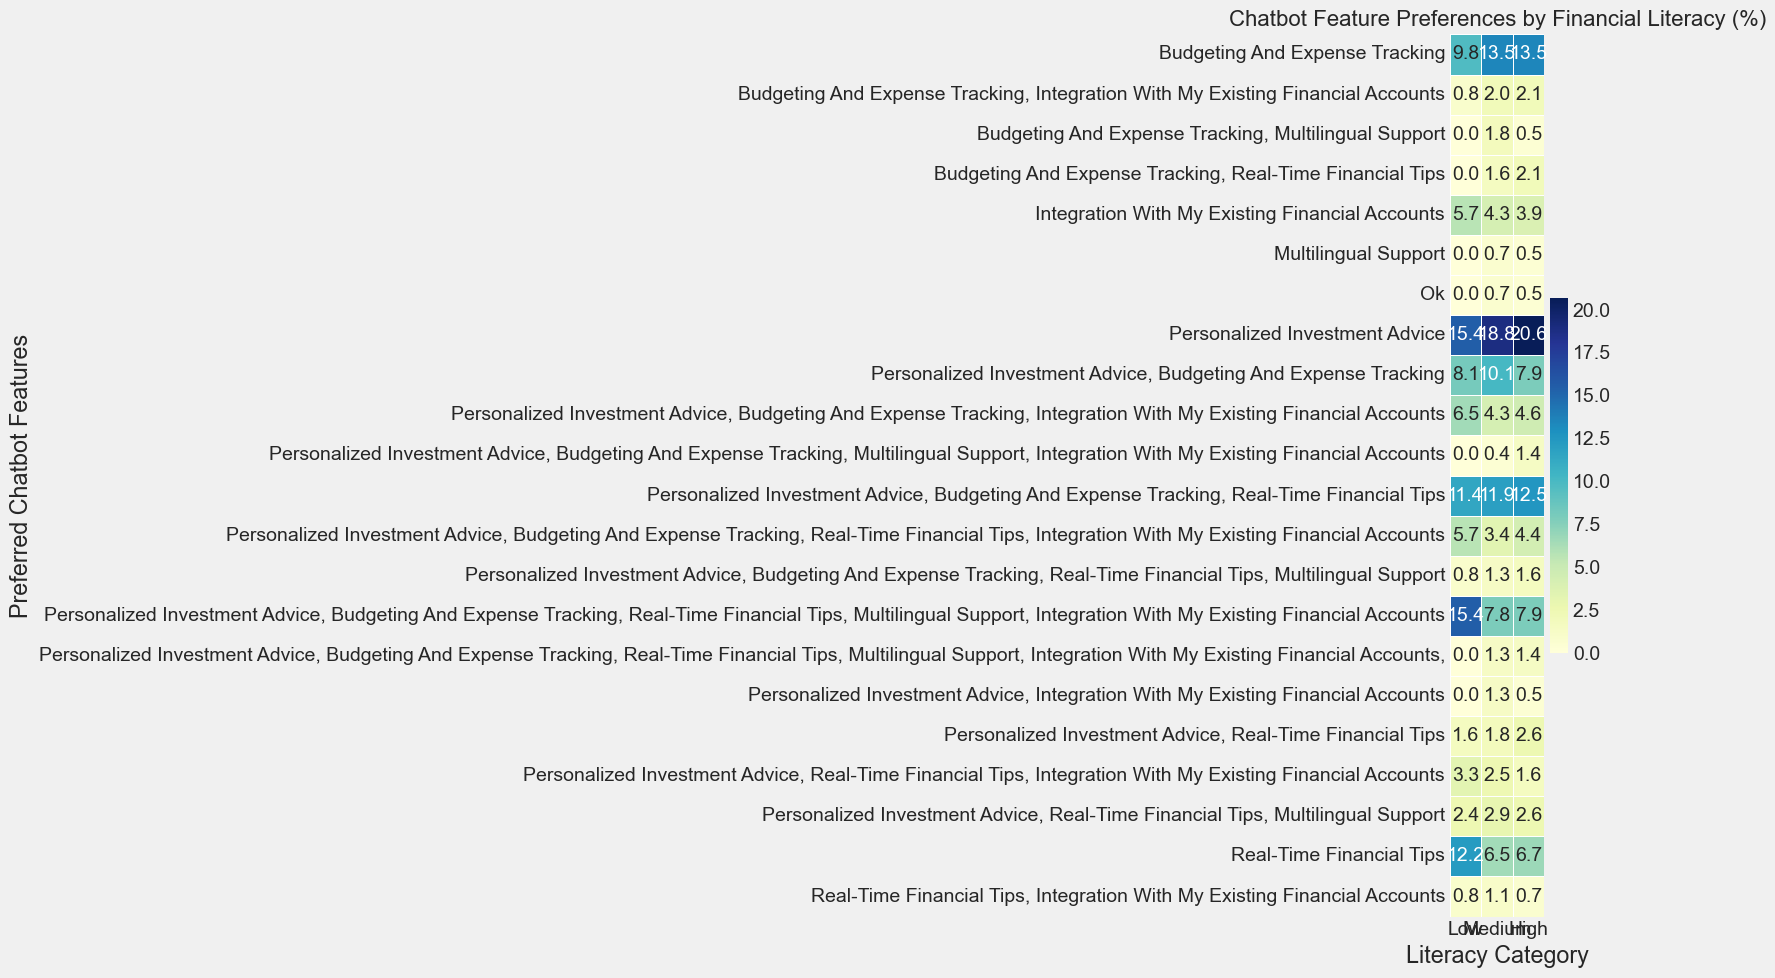

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_categorical(df, column, title=None, hue=None, palette="Set2"):
    """
    Function to plot categorical data using seaborn countplot.
    """
    if column not in df.columns:
        print(f" Warning: Column '{column}' not found in dataframe!")
        return  # Exit the function if the column is missing

    plt.figure(figsize=(12, 6))
    
    if hue:
        ax = sns.countplot(x=column, data=df, hue=hue, palette=palette)
    else:
        ax = sns.countplot(x=column, data=df, palette=palette)
    
    ax.set_title(title or f'Distribution of {column}', fontsize=16)
    plt.xticks(rotation=45)  # Rotate x labels if needed
    plt.tight_layout()
    plt.show()

# Debugging: Print available columns
print(" Available Columns:", cleaned_df.columns)

# Preferred chatbot features
print("\n Preferred Chatbot Features:")
plot_categorical(cleaned_df, 'Preferred Chatbot Features', title='Most Preferred Features in a Financial Chatbot')

# Trust factors for chatbots
print("\n Trust Factors for Chatbots:")
plot_categorical(cleaned_df, 'Trust Factors for Chatbots', title='Key Trust Factors for Chatbot Adoption')

# Concerns about using financial chatbot
print("\n Concerns About Using Financial Chatbot:")
plot_categorical(cleaned_df, 'Concerns About Using Financial Chatbot', title='Main Concerns About Using Financial Chatbots')

# Analyze feature preferences by financial literacy
plt.figure(figsize=(16, 10))

# Verify if columns exist before using them
required_cols = ['Preferred Chatbot Features', 'Literacy Category']
missing_cols = [col for col in required_cols if col not in cleaned_df.columns]

if missing_cols:
    print(f" Missing columns: {missing_cols}. Cannot generate heatmap.")
else:
    cross_tab = pd.crosstab(cleaned_df['Preferred Chatbot Features'], cleaned_df['Literacy Category'])
    cross_tab_pct = cross_tab.div(cross_tab.sum(axis=0), axis=1) * 100

    sns.heatmap(cross_tab_pct, annot=True, fmt='.1f', cmap='YlGnBu', linewidths=.5)
    plt.title('Chatbot Feature Preferences by Financial Literacy (%)', fontsize=16)
    plt.tight_layout()
    plt.show()


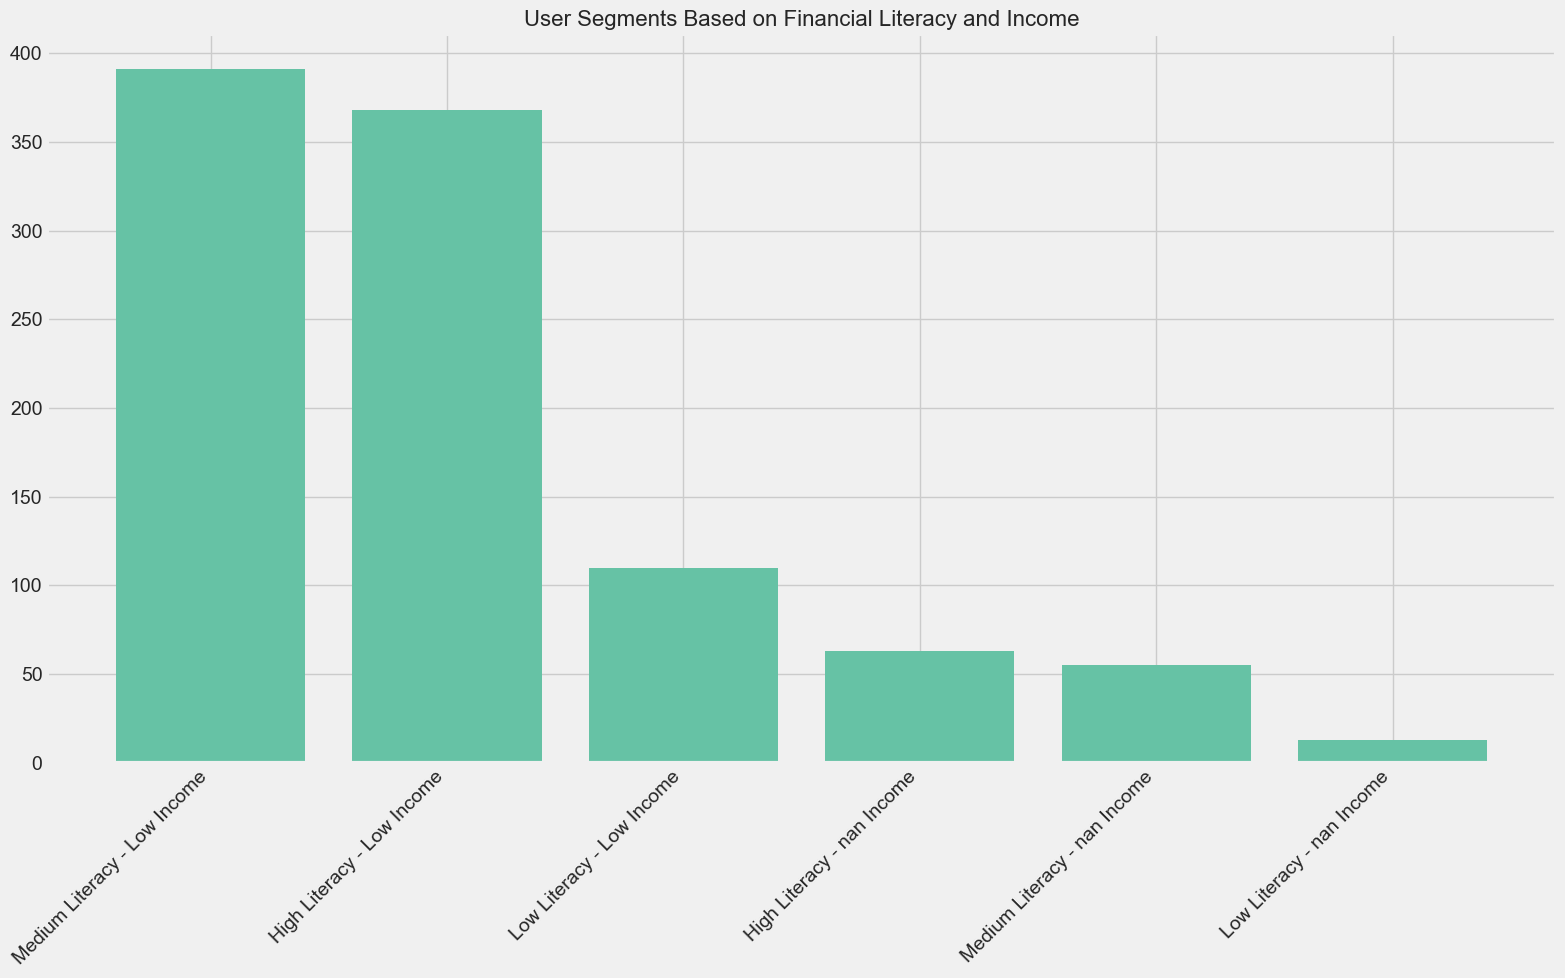

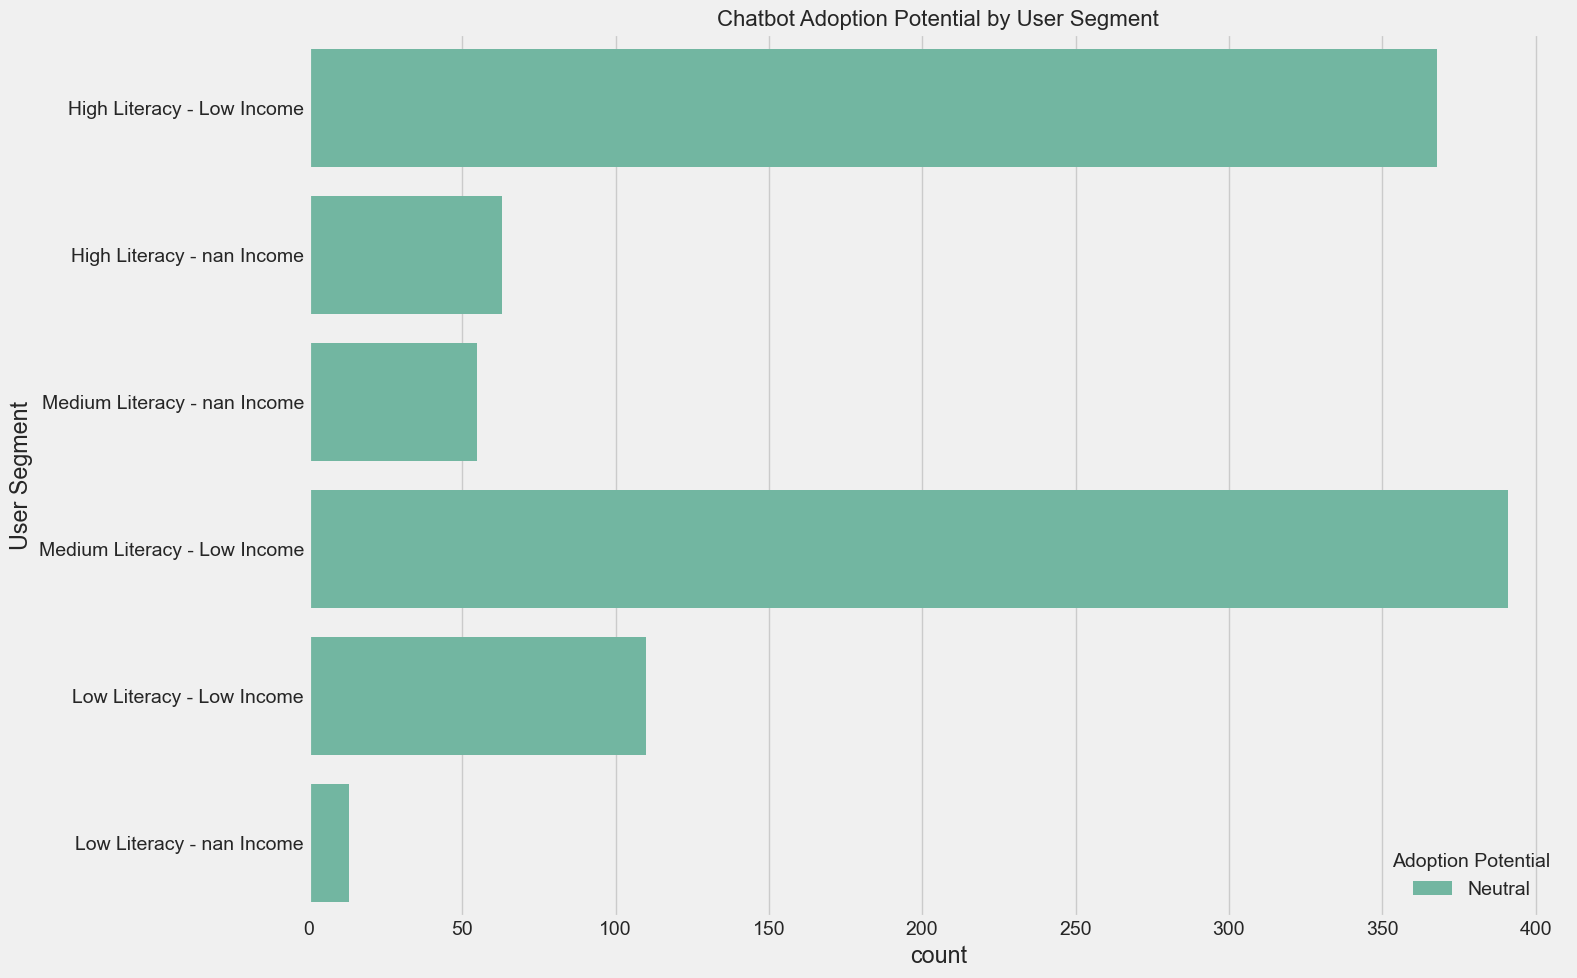

In [27]:
# Create user segments based on financial literacy and income
cleaned_df['User Segment'] = cleaned_df.apply(
    lambda row: f"{row['Literacy Category']} Literacy - {row['Income Category']} Income", 
    axis=1
)

# Analyze segments
plt.figure(figsize=(16, 10))
segment_counts = cleaned_df['User Segment'].value_counts()
plt.bar(segment_counts.index, segment_counts.values)
plt.title('User Segments Based on Financial Literacy and Income', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Analyze chatbot interest by segment
plt.figure(figsize=(16, 10))
ax = sns.countplot(y='User Segment', hue='Adoption Potential', data=cleaned_df)
plt.title('Chatbot Adoption Potential by User Segment', fontsize=16)
plt.tight_layout()

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Key findings summary
print("\n=== KEY FINDINGS ===")

# Demographic insights
print("\n1. Demographic Insights:")
if 'Location' in cleaned_df.columns and not cleaned_df['Location'].empty:
    print(f"- Most respondents are from: {cleaned_df['Location'].value_counts().idxmax()}")
else:
    print("- No location data available.")

if 'Age Group' in cleaned_df.columns and not cleaned_df['Age Group'].empty:
    print(f"- Dominant age group: {cleaned_df['Age Group'].value_counts().idxmax()}")
else:
    print("- No age group data available.")

if 'Employment Status' in cleaned_df.columns and not cleaned_df['Employment Status'].empty:
    print(f"- Most common employment status: {cleaned_df['Employment Status'].value_counts().idxmax()}")
else:
    print("- No employment data available.")

# Financial literacy insights
print("\n2. Financial Literacy Insights:")
if 'Financial Literacy Level' in cleaned_df.columns and not cleaned_df['Financial Literacy Level'].empty:
    print(f"- Average financial literacy level: {cleaned_df['Financial Literacy Level'].mean():.2f}/5")
else:
    print("- No financial literacy data available.")

if 'Primary Financial Goals' in cleaned_df.columns and not cleaned_df['Primary Financial Goals'].empty:
    print(f"- Most common financial goal: {cleaned_df['Primary Financial Goals'].value_counts().idxmax()}")
else:
    print("- No financial goals data available.")

if 'Financial Challenges' in cleaned_df.columns and not cleaned_df['Financial Challenges'].empty:
    print(f"- Top financial challenge: {cleaned_df['Financial Challenges'].value_counts().idxmax()}")
else:
    print("- No financial challenges data available.")

# Chatbot adoption insights
print("\n3. Chatbot Adoption Insights:")
if 'Adoption Potential' in cleaned_df.columns and not cleaned_df['Adoption Potential'].empty:
    positive_adoption = (cleaned_df['Adoption Potential'] == 'Positive').mean() * 100
    print(f"- Overall positive adoption potential: {positive_adoption:.1f}%")

    if 'segment_adoption' in globals() and not segment_adoption.empty:
        print(f"- Segment with highest adoption potential: {segment_adoption.idxmax()} ({segment_adoption.max():.1f}%)")
        print(f"- Segment with lowest adoption potential: {segment_adoption.idxmin()} ({segment_adoption.min():.1f}%)")
    else:
        print("- No segment adoption data available.")
else:
    print("- No adoption potential data available.")

# Feature preferences
print("\n4. Feature Preferences:")
if 'Preferred Chatbot Features' in cleaned_df.columns and not cleaned_df['Preferred Chatbot Features'].empty:
    print(f"- Most desired chatbot feature: {cleaned_df['Preferred Chatbot Features'].value_counts().idxmax()}")
else:
    print("- No chatbot feature preference data available.")

if 'Trust Factors for Chatbots' in cleaned_df.columns and not cleaned_df['Trust Factors for Chatbots'].empty:
    print(f"- Most important trust factor: {cleaned_df['Trust Factors for Chatbots'].value_counts().idxmax()}")
else:
    print("- No trust factor data available.")

if 'Concerns About Using Financial Chatbot' in cleaned_df.columns and not cleaned_df['Concerns About Using Financial Chatbot'].empty:
    print(f"- Top concern: {cleaned_df['Concerns About Using Financial Chatbot'].value_counts().idxmax()}")
else:
    print("- No chatbot concern data available.")

# Recommendations
print("\n=== RECOMMENDATIONS ===")

print("\n1. Target Audience:")
if 'segment_adoption' in globals() and not segment_adoption.empty:
    print(f"- Initial target: {segment_adoption.idxmax()} ({segment_adoption.max():.1f}%)")
    print(f"- Secondary target: {segment_adoption.nlargest(2).index[-1]} ({segment_adoption.nlargest(2).iloc[-1]:.1f}%)")
else:
    print("- No adoption segment data available.")

print("\n2. Feature Prioritization:")
if 'Preferred Chatbot Features' in cleaned_df.columns and not cleaned_df['Preferred Chatbot Features'].empty:
    top_features = cleaned_df['Preferred Chatbot Features'].value_counts().index[:3].tolist()
    print(f"- Primary feature: {top_features[0]}")
    print(f"- Secondary features: {', '.join(top_features[1:])}")
else:
    print("- No feature preference data available.")

print("\n3. Marketing Strategy:")
if 'Trust Factors for Chatbots' in cleaned_df.columns and not cleaned_df['Trust Factors for Chatbots'].empty:
    print(f"- Emphasize: {cleaned_df['Trust Factors for Chatbots'].value_counts().idxmax()}")
else:
    print("- No trust factor data available.")

if 'Concerns About Using Financial Chatbot' in cleaned_df.columns and not cleaned_df['Concerns About Using Financial Chatbot'].empty:
    print(f"- Address: {cleaned_df['Concerns About Using Financial Chatbot'].value_counts().idxmax()}")
else:
    print("- No chatbot concern data available.")

if 'Primary Financial Goals' in cleaned_df.columns and not cleaned_df['Primary Financial Goals'].empty:
    print(f"- Focus on: {cleaned_df['Primary Financial Goals'].value_counts().idxmax()}")
else:
    print("- No financial goals data available.")

print("\n4. User Experience Design:")
if 'Age Group' in cleaned_df.columns and not cleaned_df['Age Group'].empty:
    print(f"- Tailor to: {cleaned_df['Age Group'].value_counts().idxmax()}")
else:
    print("- No demographic age data available.")

if 'Financial Literacy Level' in cleaned_df.columns and not cleaned_df['Financial Literacy Level'].empty:
    print(f"- Consider: Avg literacy level of {cleaned_df['Financial Literacy Level'].mean():.2f}/5")
else:
    print("- No financial literacy data available.")

if 'Financial Challenges' in cleaned_df.columns and not cleaned_df['Financial Challenges'].empty:
    print(f"- Include: {cleaned_df['Financial Challenges'].value_counts().idxmax()} as an educational feature")
else:
    print("- No financial challenges data available.")

print("\n5. Implementation Plan:")
print("- Phase 1: MVP with core features")
print("- Phase 2: Expansion based on secondary preferences")
print("- Phase 3: Advanced features for specific segments")

# Save the cleaned dataset
output_path = "../../data/processed/cleaned_financial_chatbot_survey.csv"
try:
    cleaned_df.to_csv(output_path, index=False)
    print(f"\n✅ Cleaned dataset saved to {output_path}")
except Exception as e:
    print(f"\n❌ Failed to save cleaned dataset: {e}")
    print("You can manually export the dataframe if needed.")



=== KEY FINDINGS ===

1. Demographic Insights:
- Most respondents are from: Nairobi
- Dominant age group: 25-40 Years
- Most common employment status: Employed (Full-Time)

2. Financial Literacy Insights:
- Average financial literacy level: 3.41/5
- Most common financial goal: Investment Opportunities
- Top financial challenge: Limited Access To Financial Advisors

3. Chatbot Adoption Insights:
- Overall positive adoption potential: 0.0%
- No segment adoption data available.

4. Feature Preferences:
- Most desired chatbot feature: Personalized Investment Advice
- Most important trust factor: Strong Data Privacy And Security Policies, Accurate And Reliable Financial Advice, Easy-To-Use And Intuitive Interface, Availability Of Expert Human Support If Needed
- No chatbot concern data available.

=== RECOMMENDATIONS ===

1. Target Audience:
- No adoption segment data available.

2. Feature Prioritization:
- Primary feature: Personalized Investment Advice
- Secondary features: Budgeting An